<b><font size="6">Predictive Modelling Pipeline Template</font></b><br><br>

In this notebook we present to you the main steps you should follow throughout your project.


<b> Important: The numbered sections and subsections are merely indicative of some of the steps you should pay attention to in your project. <br>You are not required to strictly follow this order or to execute everything in separate cells.</b>
    
<img src="/content/process_ML.png" style="height:70px">

In [167]:
# Base packages
import pandas as pd
import numpy as np

# Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing packages
#Spliting
from sklearn.model_selection import train_test_split, KFold
#Encoding
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder, LabelEncoder
#Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
#Imputing
from sklearn.impute import KNNImputer

#Feature Selction
from sklearn.feature_selection import RFE, SelectKBest, chi2, mutual_info_classif, VarianceThreshold
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import spearmanr, kendalltau

# Predictive models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier,BaggingClassifier,HistGradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

#Model Selection/HyperParameters Tuning
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Scores
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate


# Others
from collections import Counter
import warnings
import itertools
from collections import defaultdict, Counter
from sklearn.exceptions import ConvergenceWarning
from IPython.display import display

<a class="anchor" id="">

# 1. Import data (Data Integration)

</a>


<img src="image/step1.png" style="height:60px">

In [169]:
train_data = pd.read_csv('obesity_train.csv')
train=train_data.copy()

<a class="anchor" id="">

# 2. Explore data (Data access, exploration and understanding)

</a>

<img src="image/step2.png" style="height:60px">

Remember, this step is very important as it is at this stage that you will really look into the data that you have. Generally speaking, if you do well at this stage, the following stages will be very smooth.

Moreover, you should also take the time to find meaningful patterns on the data: what interesting relationships can be found between the variables and how can that knowledge be inform your future decisions.

In [170]:
#Seeing head and tail
pd.options.display.max_columns = None
train.head()

,id,age,alcohol_freq,caloric_freq,devices_perday,eat_between_meals,gender,height,marrital_status,meals_perday,monitor_calories,parent_overweight,physical_activity_perweek,region,siblings,smoke,transportation,veggies_freq,water_daily,weight,obese_level
0,1,21.0,Never,no,up to 5,Sometimes,Female,1.62,NaN,3.0,no,yes,NaN,LatAm,3.0,no,Public,Sometimes,1 to 2,64.0,Normal_Weight
1,2,23.0,Frequently,no,up to 5,Sometimes,Male,1.80,NaN,3.0,no,yes,3 to 4,LatAm,0.0,no,Public,Sometimes,1 to 2,77.0,Normal_Weight
2,3,NaN,Frequently,no,up to 2,Sometimes,Male,1.80,NaN,3.0,no,no,3 to 4,LatAm,2.0,no,Walk,Always,1 to 2,87.0,Overweight_Level_I
3,4,22.0,Sometimes,no,up to 2,Sometimes,Male,1.78,NaN,1.0,no,no,NaN,LatAm,3.0,no,Public,Sometimes,1 to 2,90.0,Overweight_Level_II
4,5,22.0,Sometimes,no,up to 2,Sometimes,Male,1.64,NaN,3.0,no,no,5 or more,LatAm,3.0,no,Public,Sometimes,1 to 2,53.0,Normal_Weight


In [171]:
train.tail()

,id,age,alcohol_freq,caloric_freq,devices_perday,eat_between_meals,gender,height,marrital_status,meals_perday,monitor_calories,parent_overweight,physical_activity_perweek,region,siblings,smoke,transportation,veggies_freq,water_daily,weight,obese_level
1606,1607,21.0,Sometimes,NaN,up to 5,Sometimes,Female,1.73,NaN,3.0,no,yes,3 to 4,LatAm,1.0,no,Public,Always,1 to 2,131.0,Obesity_Type_III
1607,1608,22.0,Sometimes,yes,up to 5,Sometimes,Female,1.75,NaN,3.0,no,yes,1 to 2,LatAm,0.0,no,NaN,Always,1 to 2,134.0,Obesity_Type_III
1608,1609,23.0,Sometimes,yes,up to 5,Sometimes,Female,1.75,NaN,3.0,no,yes,1 to 2,LatAm,0.0,no,Public,Always,1 to 2,134.0,Obesity_Type_III
1609,1610,24.0,Sometimes,yes,up to 5,Sometimes,Female,1.74,NaN,3.0,no,yes,1 to 2,LatAm,0.0,no,Public,Always,more than 2,133.0,Obesity_Type_III
1610,1611,24.0,Sometimes,yes,up to 5,Sometimes,Female,1.74,NaN,3.0,no,yes,1 to 2,LatAm,0.0,no,Public,Always,more than 2,133.0,Obesity_Type_III


In [172]:
#Info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1611 non-null   int64  
 1   age                        1545 non-null   float64
 2   alcohol_freq               1575 non-null   object 
 3   caloric_freq               1591 non-null   object 
 4   devices_perday             1589 non-null   object 
 5   eat_between_meals          1552 non-null   object 
 6   gender                     1591 non-null   object 
 7   height                     1597 non-null   float64
 8   marrital_status            0 non-null      float64
 9   meals_perday               1602 non-null   float64
 10  monitor_calories           1572 non-null   object 
 11  parent_overweight          1591 non-null   object 
 12  physical_activity_perweek  1046 non-null   object 
 13  region                     1544 non-null   objec

In [173]:
#Shape
train.shape

(1611, 21)

In [174]:
#Columns
train.columns

Index(['id', 'age', 'alcohol_freq', 'caloric_freq', 'devices_perday',
       'eat_between_meals', 'gender', 'height', 'marrital_status',
       'meals_perday', 'monitor_calories', 'parent_overweight',
       'physical_activity_perweek', 'region', 'siblings', 'smoke',
       'transportation', 'veggies_freq', 'water_daily', 'weight',
       'obese_level'],
      dtype='object')

In [175]:
#Dividing in numeric and categoric columns
numeric_cols=[*train.select_dtypes(include=np.number).columns]
categoric_cols=[*train.select_dtypes(exclude=np.number).columns]

In [176]:
#For numeric
train.describe()

,id,age,height,marrital_status,meals_perday,siblings,weight
count,1611.000000,1545.000000,1597.000000,0.0,1602.000000,1599.000000,1558.000000
mean,806.000000,24.344984,1.704108,NaN,2.684145,1.500938,86.956354
std,465.199957,6.474498,0.095567,NaN,0.817584,1.132562,26.072339
min,1.000000,6.000000,1.290000,NaN,1.000000,0.000000,32.000000
25%,403.500000,20.000000,1.630000,NaN,3.000000,0.000000,67.000000
50%,806.000000,23.000000,1.700000,NaN,3.000000,2.000000,83.000000
75%,1208.500000,26.000000,1.770000,NaN,3.000000,3.000000,107.000000
max,1611.000000,88.000000,2.190000,NaN,4.000000,3.000000,193.000000


In [177]:
#For categoric
train.describe(include="O")

,alcohol_freq,caloric_freq,devices_perday,eat_between_meals,gender,monitor_calories,parent_overweight,physical_activity_perweek,region,smoke,transportation,veggies_freq,water_daily,obese_level
count,1575,1591,1589,1552,1591,1572,1591,1046,1544,1599,1571,1585,1577,1611
unique,4,2,3,4,2,2,2,3,1,2,5,3,3,7
top,Sometimes,yes,up to 2,Sometimes,Male,no,yes,1 to 2,LatAm,no,Public,Sometimes,1 to 2,Obesity_Type_I
freq,1057,1400,708,1306,826,1501,1309,595,1544,1568,1173,761,834,269


The column marrital_status only has NaN values, we should drop it in the future.
It also seems that the column region only has one value, we should also drop it.

In [178]:
#Checking missing values 
train.isnull().sum()

id                              0
age                            66
alcohol_freq                   36
caloric_freq                   20
devices_perday                 22
eat_between_meals              59
gender                         20
height                         14
marrital_status              1611
meals_perday                    9
monitor_calories               39
parent_overweight              20
physical_activity_perweek     565
region                         67
siblings                       12
smoke                          12
transportation                 40
veggies_freq                   26
water_daily                    34
weight                         53
obese_level                     0
dtype: int64

In [179]:
#% of missng values
for column in train.columns:
    print(f'{column} has {(train[column].isna().sum()/len(train[column])*100):.2f}% of missing values')

id has 0.00% of missing values
age has 4.10% of missing values
alcohol_freq has 2.23% of missing values
caloric_freq has 1.24% of missing values
devices_perday has 1.37% of missing values
eat_between_meals has 3.66% of missing values
gender has 1.24% of missing values
height has 0.87% of missing values
marrital_status has 100.00% of missing values
meals_perday has 0.56% of missing values
monitor_calories has 2.42% of missing values
parent_overweight has 1.24% of missing values
physical_activity_perweek has 35.07% of missing values
region has 4.16% of missing values
siblings has 0.74% of missing values
smoke has 0.74% of missing values
transportation has 2.48% of missing values
veggies_freq has 1.61% of missing values
water_daily has 2.11% of missing values
weight has 3.29% of missing values
obese_level has 0.00% of missing values


The columns with a lot of problems regarding missing values are marrital_status (which will be dropped) and possibly physical_activity_perweek

In [180]:
#Checking different values for categoric columns
for col in categoric_cols:
    print("\n",train[col].value_counts(),"\n---------------")


 alcohol_freq
Sometimes     1057
Never          466
Frequently      51
Always           1
Name: count, dtype: int64 
---------------

 caloric_freq
yes    1400
no      191
Name: count, dtype: int64 
---------------

 devices_perday
up to 2        708
up to 5        696
more than 5    185
Name: count, dtype: int64 
---------------

 eat_between_meals
Sometimes     1306
Frequently     170
Never           41
Always          35
Name: count, dtype: int64 
---------------

 gender
Male      826
Female    765
Name: count, dtype: int64 
---------------

 monitor_calories
no     1501
yes      71
Name: count, dtype: int64 
---------------

 parent_overweight
yes    1309
no      282
Name: count, dtype: int64 
---------------

 physical_activity_perweek
1 to 2       595
3 to 4       360
5 or more     91
Name: count, dtype: int64 
---------------

 region
LatAm    1544
Name: count, dtype: int64 
---------------

 smoke
no     1568
yes      31
Name: count, dtype: int64 
---------------

 transporta

There are some variable which some values do not appear a lot (always in alcohol frequency,bicycle, walk in transportation).
The target is well divided 

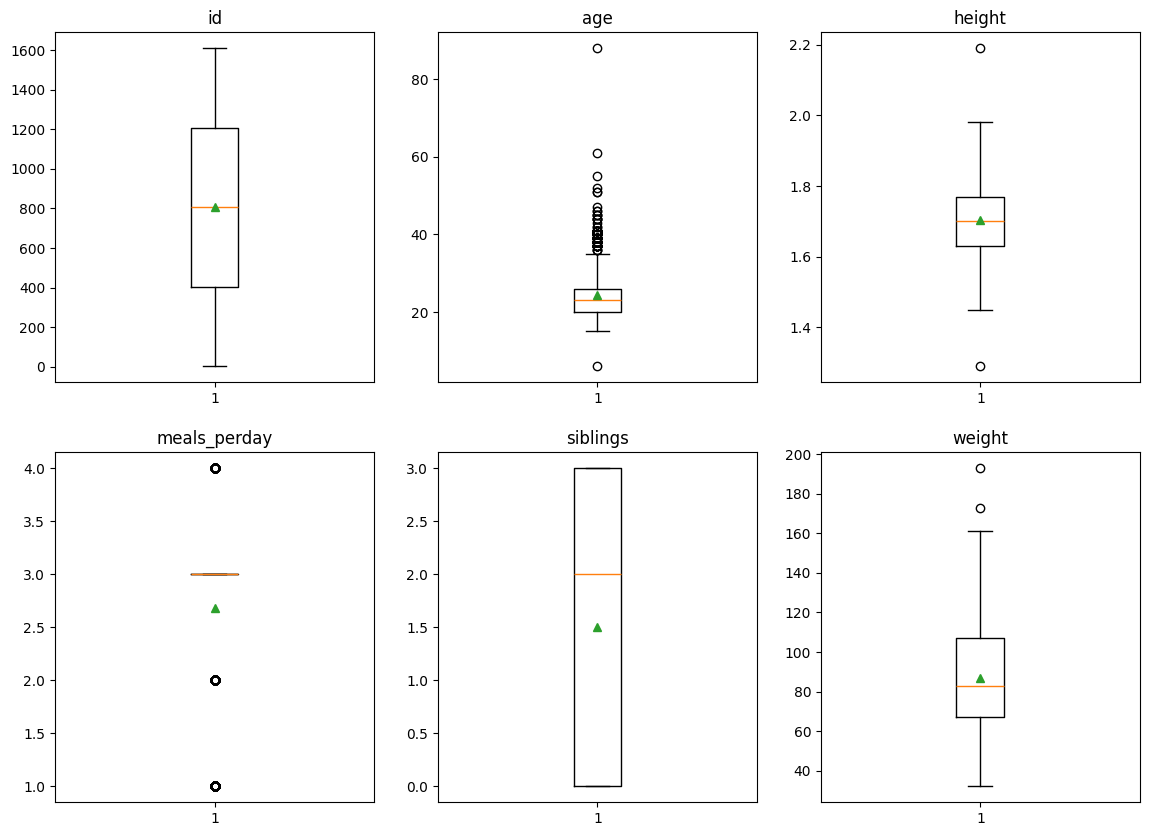

In [181]:
#Creating boxplots for all numerical values, except marrital_status, which is empty
numeric_cols_no_marrital=[val for val in numeric_cols if val != "marrital_status"]
fig,ax=plt.subplots(nrows=2, ncols=3, figsize=(14,10))
for i in range(2):
    for j in range(3):
        ax[i,j].boxplot(train[numeric_cols_no_marrital[i*3+j]].dropna(), showmeans=True)
        ax[i,j].set_title(numeric_cols_no_marrital[i*3+j])
plt.show()

There are two outliers in age, two in height and two in weight

C:\Users\Duarte\AppData\Local\Temp\ipykernel_17248\1188576541.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


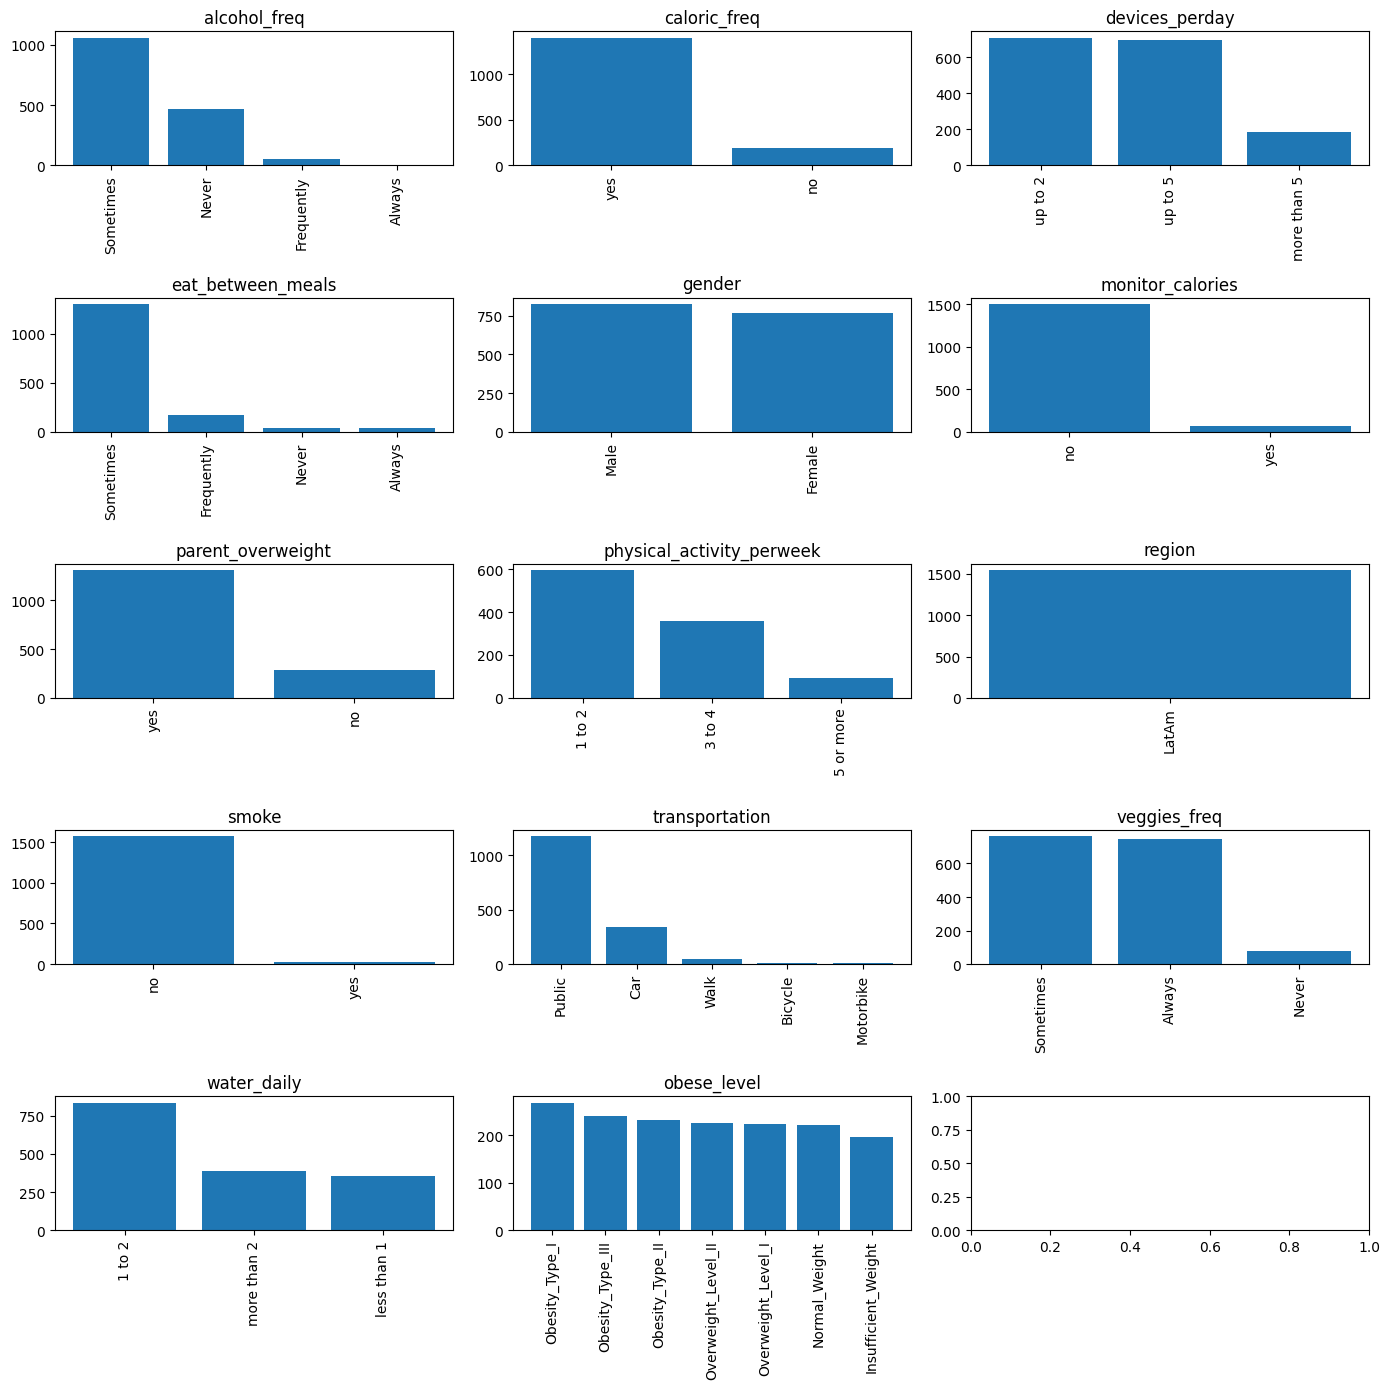

In [182]:
#Checking values for categorical variables
fig,ax=plt.subplots(nrows=5,ncols=3, figsize=(14,14))
for i in range(5):
    for j in range(3):
        tempvar=train[categoric_cols[i*3+j]].value_counts()
        ax[i,j].bar(tempvar.index, tempvar.values)
        ax[i,j].set_title(categoric_cols[i*3+j])
        ax[i,j].tick_params(axis='x', labelrotation = 90)
        if i*3+j>=13:
            break
fig.tight_layout()
fig.show()

Smoking has very little yes values, probably will not be a good predictor

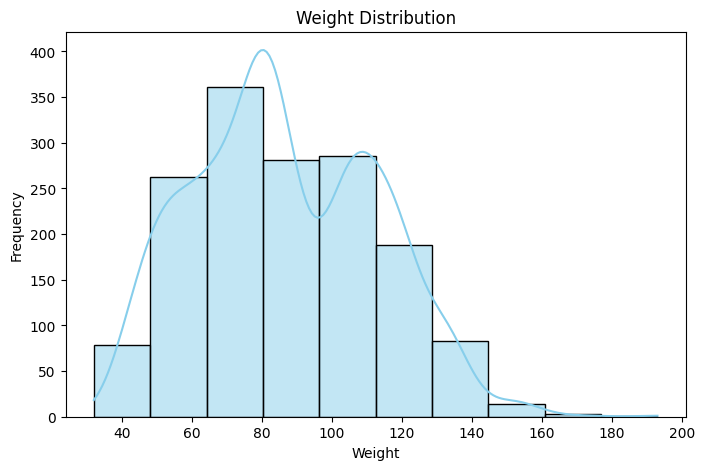

In [184]:
#Weight Distribution
plt.figure(figsize=(8, 5))
sns.histplot(train['weight'], bins=10, kde=True, color='skyblue')
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

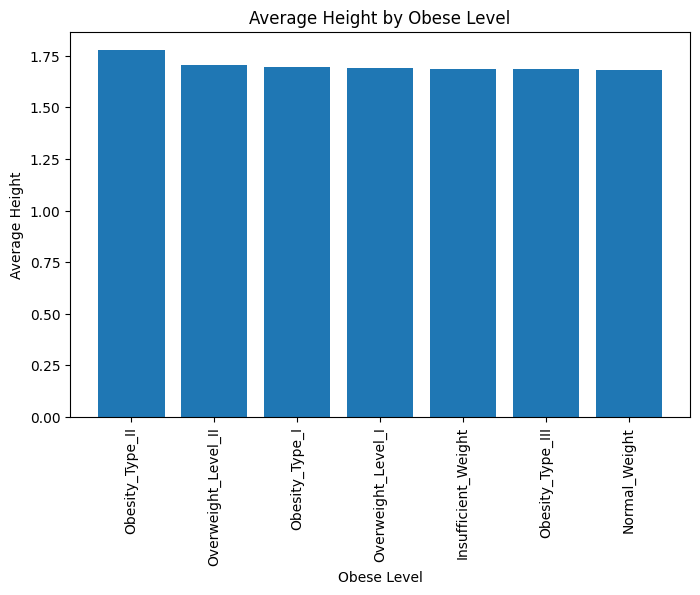

In [186]:
#Height by obese level
plt.figure(figsize=(8, 5))
avg_height = train.groupby('obese_level')['height'].mean().reset_index()
avg_height = avg_height.sort_values(by='height', ascending=False)
plt.bar(avg_height['obese_level'], avg_height['height'])
plt.xlabel('Obese Level')
plt.ylabel('Average Height')
plt.title('Average Height by Obese Level')
plt.xticks(rotation=90)
plt.show()

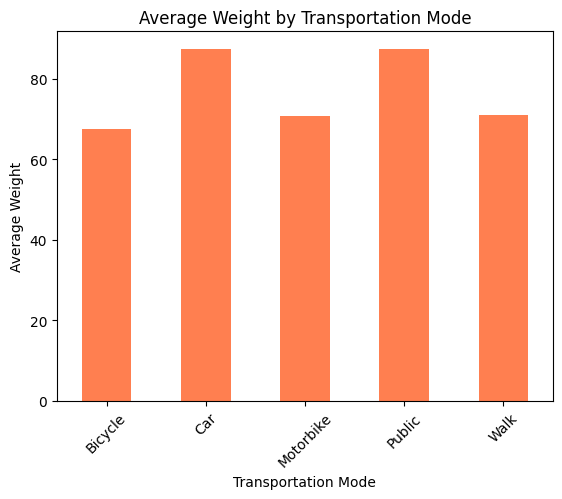

In [187]:
#Weight by transportation
train.groupby('transportation')['weight'].mean().plot(kind='bar', color='coral')
plt.title('Average Weight by Transportation Mode')
plt.xlabel('Transportation Mode')
plt.ylabel('Average Weight')
plt.xticks(rotation=45)
plt.show()

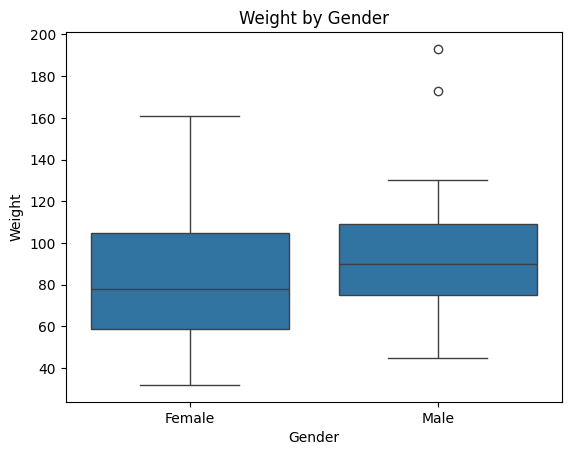

In [188]:
#Weight by gender
sns.boxplot(x='gender', y='weight', data=train)
plt.title('Weight by Gender')
plt.xlabel('Gender')
plt.ylabel('Weight')
plt.show()

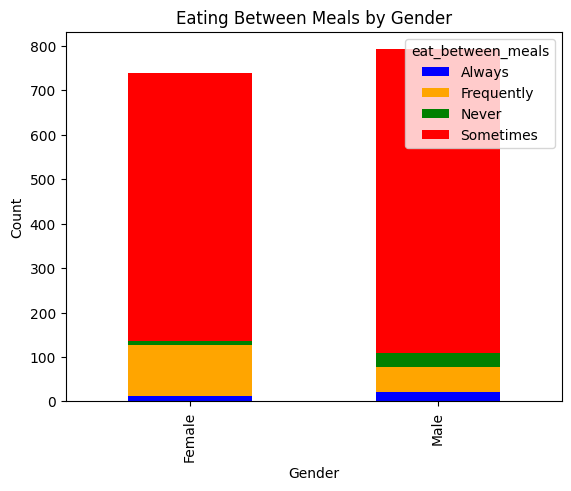

In [189]:
#Eating between meals by gender
pd.crosstab(train['obese_level'], train['eat_between_meals']).plot(kind='bar', stacked=True, color=['blue', 'orange',"green","red"])
plt.title('Eating Between Meals by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

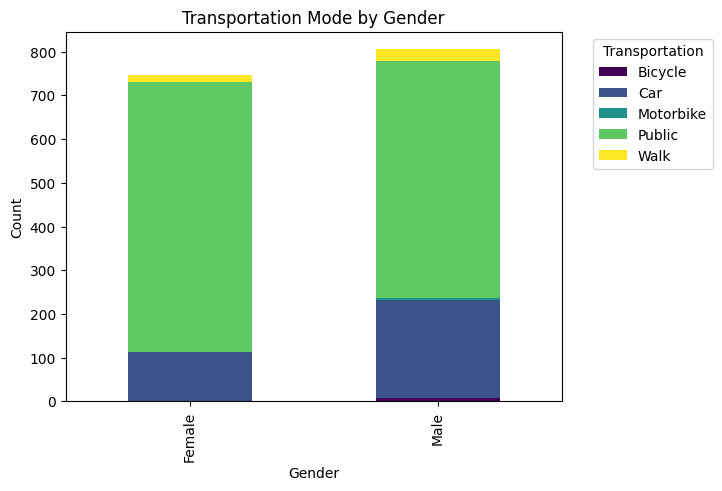

In [190]:
#Transportation by gender
pd.crosstab(train['obese_level'], train['transportation']).plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Transportation Mode by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Transportation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

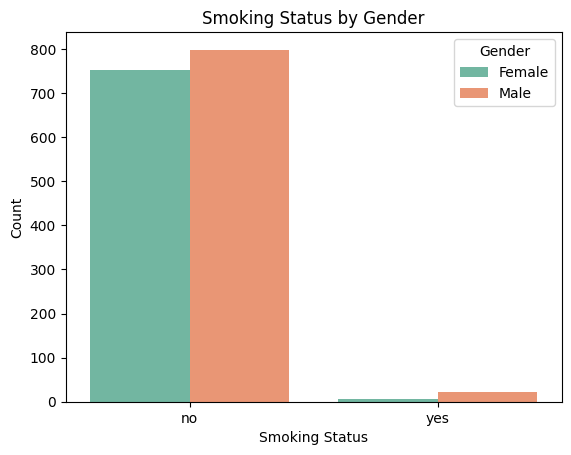

In [191]:
#Smoking by gender
sns.countplot(x='smoke', hue='gender', data=train, palette='Set2')
plt.title('Smoking Status by Gender')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right')
plt.show()

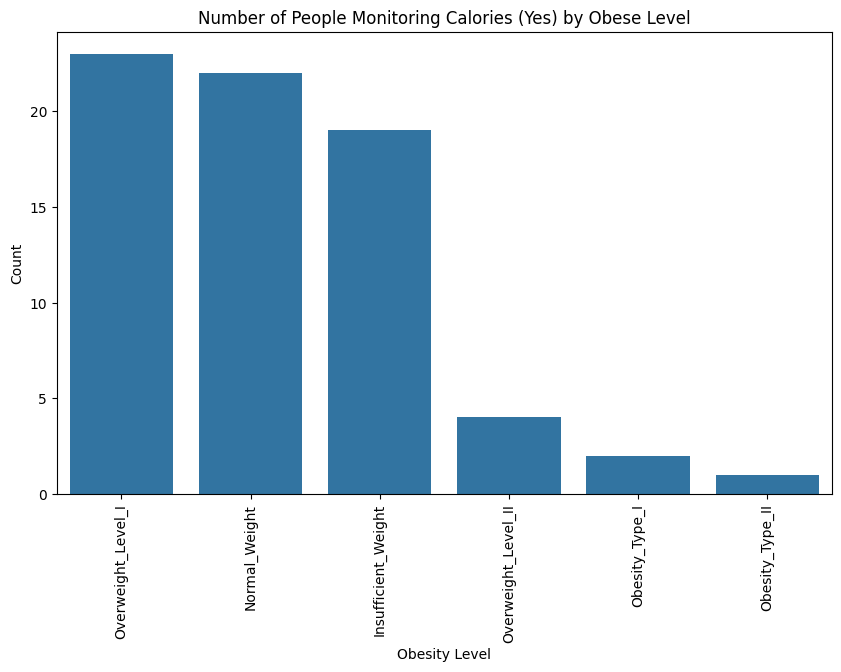

In [192]:
#Monitoring calories by obese lavel
monitor_yes = train[train['monitor_calories'] == 'yes']

monitor_counts = monitor_yes.groupby('obese_level').size().reset_index(name='count')
monitor_counts = monitor_counts.sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='obese_level', y='count', data=monitor_counts)
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.title('Number of People Monitoring Calories (Yes) by Obese Level')
plt.xticks(rotation=90)
plt.show()

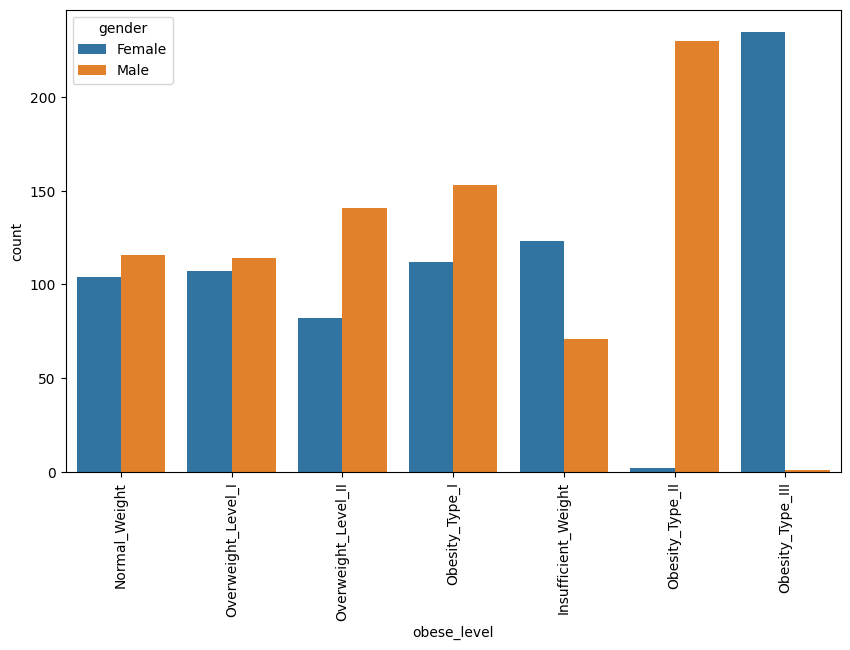

In [193]:
#Obese Level by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='obese_level', hue='gender', data=train)
plt.xticks(rotation=90)
plt.show()

Very few women with obesity type III and men with obesity type II

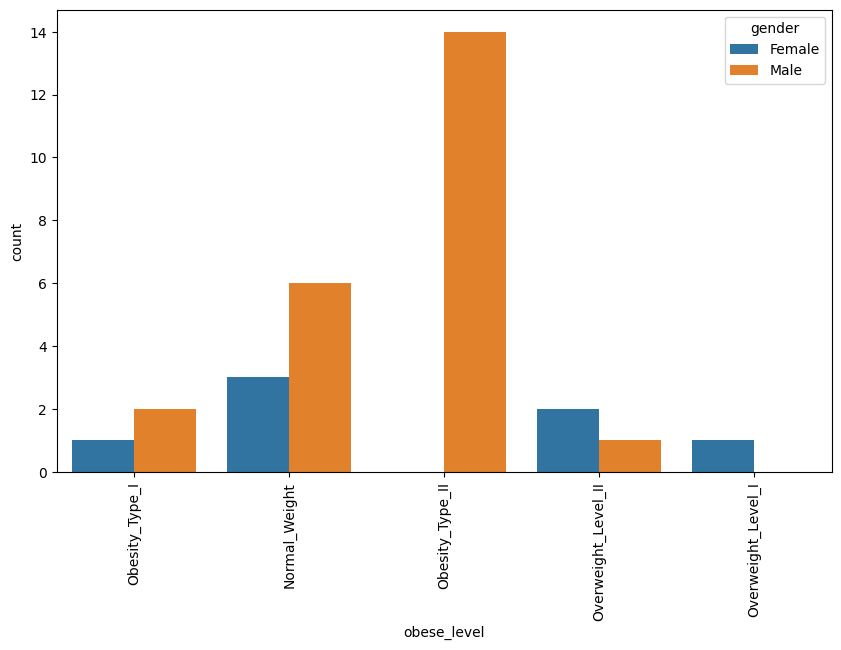

In [194]:
#Smoke by gender and obese_level
plt.figure(figsize=(10, 6))
sns.countplot(x='obese_level', hue='gender', data=train[train["smoke"]=="yes"])
plt.xticks(rotation=90)
plt.show()

Once again, smoking will probably not be a good predictor

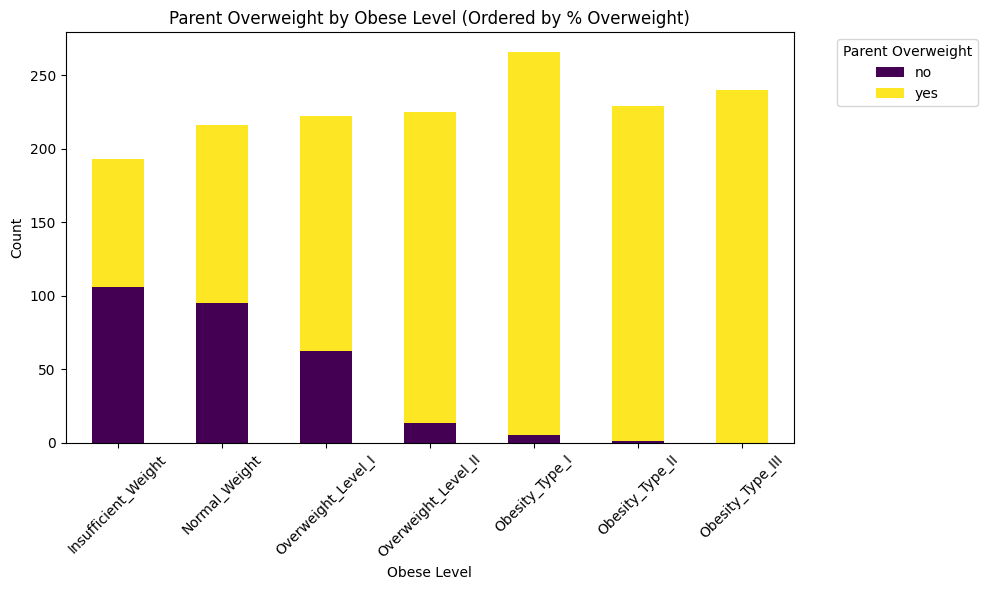

In [195]:
#Parent overweight by Obese Level
crosstab = pd.crosstab(train['obese_level'], train['parent_overweight'])

percentages = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

if 'yes' in percentages.columns:  
    ordered_crosstab = crosstab.loc[percentages['yes'].sort_values(ascending=True).index]
else:
    print("Ensure you replace 'Yes' with the correct column representing overweight!")

# Plot the ordered crosstab
ordered_crosstab.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Parent Overweight by Obese Level (Ordered by % Overweight)')
plt.xlabel('Obese Level')
plt.ylabel('Count')
plt.legend(title='Parent Overweight', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Will be an important predictor!!!!!

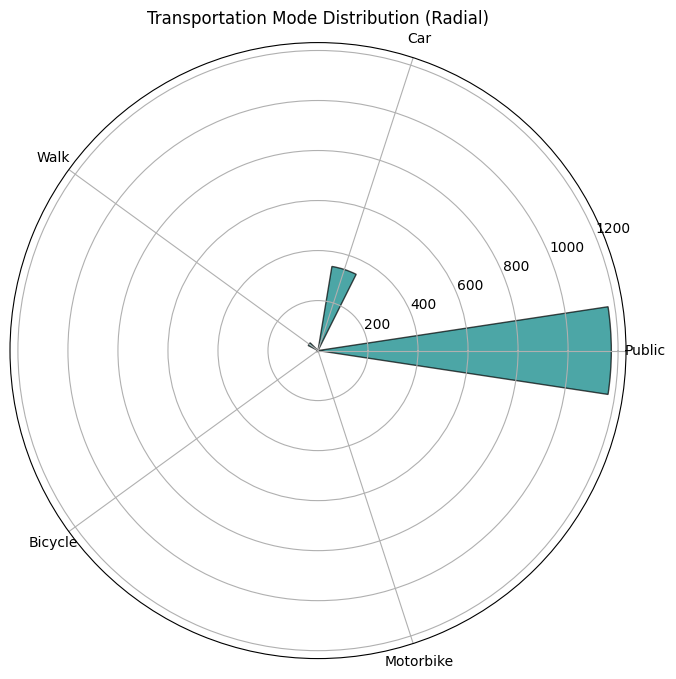

In [196]:
category_counts = train['transportation'].value_counts()

# Set up the figure and axes for the radial chart
categories = category_counts.index
values = category_counts.values
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()

# Create the radial bar chart
plt.figure(figsize=(8, 8))
plt.subplot(111, polar=True)
plt.bar(angles, values, width=0.3, color='teal', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xticks(angles, categories, rotation=45)
plt.title('Transportation Mode Distribution (Radial)')
plt.show()

Most transportation is done by public or car

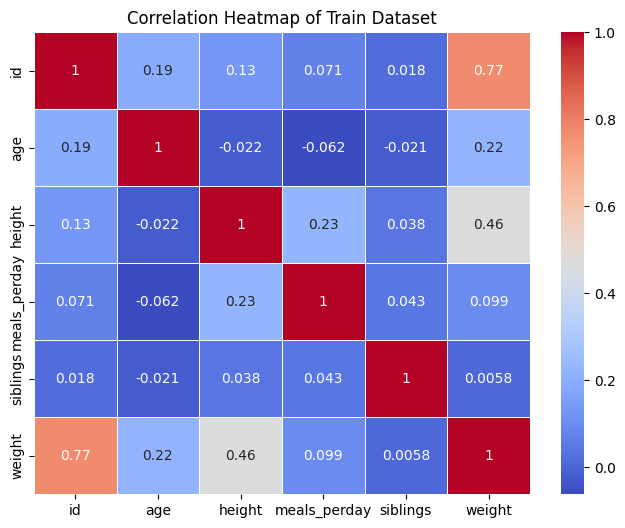

In [197]:
correlation_matrix = train[numeric_cols].drop(columns="marrital_status").corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Train Dataset')
plt.show()


There are not variables with a lot of correlation

<a class="anchor" id="">

# 3. Modify data (Data preparation)

</a>

<img src="image/step3.png" style="height:60px">

Use this section to apply transformations to your dataset.

Remember that your decisions at this step should be exclusively informed by your **training data**. While you will need to split your data between training and validation, how that split will be made and how to apply the approppriate transformations will depend on the type of model assessment solution you select for your project (each has its own set of advantages and disadvantages that you need to consider). **Please find a list of possible methods for model assessment below**:

1. **Holdout method**
2. **Repeated Holdout method**
3. **Cross-Validation**

__Note:__ Instead of creating different sections for the treatment of training and validation data, you can make the transformations in the same cell. There is no need to create a specific section for that.

### 3.1. Data Preparation

In [198]:
#Dropping variables missing or univariate
train.drop(columns=["marrital_status","region"],inplace=True)


In [199]:
#Finding and Removing Ages not in study 
print(train[(train["age"] < 16) | (train["age"] > 56)])
train = train[(train["age"] >= 16) & (train["age"] <= 56)]


        id   age alcohol_freq caloric_freq devices_perday eat_between_meals  \
86      87  15.0        Never          yes    more than 5         Sometimes   
100    101  61.0   Frequently          yes        up to 5            Always   
115    116   6.0        Never           no            NaN         Sometimes   
1013  1014  88.0        Never          yes        up to 2         Sometimes   

      gender  height  meals_perday monitor_calories parent_overweight  \
86    Female    1.65           3.0               no               yes   
100   Female     NaN           3.0               no                no   
115     Male    2.19           3.0               no               yes   
1013  Female    1.62           1.0               no               yes   

     physical_activity_perweek  siblings smoke transportation veggies_freq  \
86                   5 or more       3.0    no           Walk       Always   
100                     1 to 2       0.0    no         Public       Always   
115 

In [200]:
#Finding and removing the two outliers from height and weight
print(train[(train["weight"] < 32) | (train["weight"] > 161)])
train= train[(train["weight"] >= 32) & (train["weight"] <= 161)]
print(train[(train["height"] < 1.45) | (train["height"] > 1.98)])
train =train[(train["height"] >= 1.45) & (train["height"] <= 1.98)]


      id   age alcohol_freq caloric_freq devices_perday eat_between_meals  \
344  345  19.0    Sometimes          yes        up to 5         Sometimes   

    gender  height  meals_perday monitor_calories parent_overweight  \
344   Male    1.71           3.0               no                no   

    physical_activity_perweek  siblings smoke transportation veggies_freq  \
344                    1 to 2       3.0    no         Public       Always   

    water_daily  weight    obese_level  
344      1 to 2   193.0  Normal_Weight  
        id   age alcohol_freq caloric_freq devices_perday eat_between_meals  \
1135  1136  39.0    Sometimes          yes        up to 2         Sometimes   

      gender  height  meals_perday monitor_calories parent_overweight  \
1135  Female    1.29           3.0               no               yes   

     physical_activity_perweek  siblings smoke transportation veggies_freq  \
1135                       NaN       2.0    no            Car    Sometimes   

  

In [201]:
train

,id,age,alcohol_freq,caloric_freq,devices_perday,eat_between_meals,gender,height,meals_perday,monitor_calories,parent_overweight,physical_activity_perweek,siblings,smoke,transportation,veggies_freq,water_daily,weight,obese_level
0,1,21.0,Never,no,up to 5,Sometimes,Female,1.62,3.0,no,yes,NaN,3.0,no,Public,Sometimes,1 to 2,64.0,Normal_Weight
1,2,23.0,Frequently,no,up to 5,Sometimes,Male,1.80,3.0,no,yes,3 to 4,0.0,no,Public,Sometimes,1 to 2,77.0,Normal_Weight
3,4,22.0,Sometimes,no,up to 2,Sometimes,Male,1.78,1.0,no,no,NaN,3.0,no,Public,Sometimes,1 to 2,90.0,Overweight_Level_II
4,5,22.0,Sometimes,no,up to 2,Sometimes,Male,1.64,3.0,no,no,5 or more,3.0,no,Public,Sometimes,1 to 2,53.0,Normal_Weight
5,6,24.0,Frequently,yes,up to 5,Sometimes,Male,1.78,3.0,no,yes,1 to 2,2.0,no,Public,Always,1 to 2,64.0,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1606,1607,21.0,Sometimes,NaN,up to 5,Sometimes,Female,1.73,3.0,no,yes,3 to 4,1.0,no,Public,Always,1 to 2,131.0,Obesity_Type_III
1607,1608,22.0,Sometimes,yes,up to 5,Sometimes,Female,1.75,3.0,no,yes,1 to 2,0.0,no,NaN,Always,1 to 2,134.0,Obesity_Type_III
1608,1609,23.0,Sometimes,yes,up to 5,Sometimes,Female,1.75,3.0,no,yes,1 to 2,0.0,no,Public,Always,1 to 2,134.0,Obesity_Type_III
1609,1610,24.0,Sometimes,yes,up to 5,Sometimes,Female,1.74,3.0,no,yes,1 to 2,0.0,no,Public,Always,more than 2,133.0,Obesity_Type_III


### 3.2. Feature Engineering

In [202]:
#Creating Derived Variables
train["BMI"]=train["weight"]/(train["height"]**2)

BMI is very important in weight study

In [203]:
#Enconding Ordinal columns
ordinal_columns=["eat_between_meals","alcohol_freq","veggies_freq","water_daily","obese_level"]
categories = {
    "eat_between_meals": ["Never", "Sometimes", "Frequently","Always"], 
    "alcohol_freq": ["Never", "Rarely", "Sometimes", "Often","Always"], 
    "veggies_freq": ["Never", "Sometimes", "Often","Always"],
    "water_daily":["less than 1","1 to 2","more than 2"],
    "obese_level":['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
               'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 
               'Obesity_Type_III']
}

# Initialize the OrdinalEncoder with specified categories
oe = OrdinalEncoder(categories=[
    categories["eat_between_meals"],
    categories["alcohol_freq"],
    categories["veggies_freq"],
    categories["water_daily"],
    categories["obese_level"]
], handle_unknown='use_encoded_value', unknown_value=np.nan)

# Apply the OrdinalEncoder to the columns in the train DataFrame
train[ordinal_columns] = oe.fit_transform(train[ordinal_columns])

#Encoding Binary Columns (0 or 1)
binary_columns = ["parent_overweight", "smoke", "monitor_calories", "caloric_freq"]

for col in binary_columns:
    nan_mask = train[col].isna()
    train[col] = train[col].map({'yes': 1, 'no': 0})
    train[col] = train[col].where(~nan_mask, np.nan)


#Encoding ordinal columns with values we can assign numbers to

train_map = {"0": 0,"1 to 2": 1.5,"3 to 4": 3.5,"5 or more": 5}
train['physical_activity_perweek'] = train['physical_activity_perweek'].map(train_map)

devices_map = {"up to 2":1,"up to 5":3.5,"more than 5":6}
train["devices_perday"] = train["devices_perday"].map(devices_map)

#Encoding Gender
le = LabelEncoder()

train["gender"] = train["gender"].fillna("Unknown")


train["gender"] = le.fit_transform(train["gender"])

train["gender"].replace(le.transform(["Unknown"])[0], np.nan, inplace=True)


#Enconding Transportation - Creating Dummy Variables

train['transportation'] = train['transportation'].replace(['Bicycle', 'Walk'], 'Passive Transportation')

train['transportation'] = train['transportation'].replace(['Motorbike', 'Car'], 'Motorized Transportation')


col = train[["transportation"]]
encoder = OneHotEncoder()
one_hot_encoded = encoder.fit_transform(col)
# Create DataFrame from one-hot encoded array
one_hot_df = pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.get_feature_names_out(["transportation"]))

one_hot_df.index = train.index 
 # Ensure indices match

# Merge back with original DataFrame
train = pd.concat([train.drop(columns=["transportation"]), one_hot_df], axis=1)

# Check result
train.head()

C:\Users\Duarte\AppData\Local\Temp\ipykernel_17248\332246879.py:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["gender"].replace(le.transform(["Unknown"])[0], np.nan, inplace=True)


,id,age,alcohol_freq,caloric_freq,devices_perday,eat_between_meals,gender,height,meals_perday,monitor_calories,parent_overweight,physical_activity_perweek,siblings,smoke,veggies_freq,water_daily,weight,obese_level,BMI,transportation_Motorized Transportation,transportation_Passive Transportation,transportation_Public,transportation_nan
0,1,21.0,0.0,0.0,3.5,1.0,0.0,1.62,3.0,0.0,1.0,NaN,3.0,0.0,1.0,1.0,64.0,1.0,24.386526,0.0,0.0,1.0,0.0
1,2,23.0,NaN,0.0,3.5,1.0,1.0,1.80,3.0,0.0,1.0,3.5,0.0,0.0,1.0,1.0,77.0,1.0,23.765432,0.0,0.0,1.0,0.0
3,4,22.0,2.0,0.0,1.0,1.0,1.0,1.78,1.0,0.0,0.0,NaN,3.0,0.0,1.0,1.0,90.0,3.0,28.405504,0.0,0.0,1.0,0.0
4,5,22.0,2.0,0.0,1.0,1.0,1.0,1.64,3.0,0.0,0.0,5.0,3.0,0.0,1.0,1.0,53.0,1.0,19.705532,0.0,0.0,1.0,0.0
5,6,24.0,NaN,1.0,3.5,1.0,1.0,1.78,3.0,0.0,1.0,1.5,2.0,0.0,3.0,1.0,64.0,1.0,20.199470,0.0,0.0,1.0,0.0


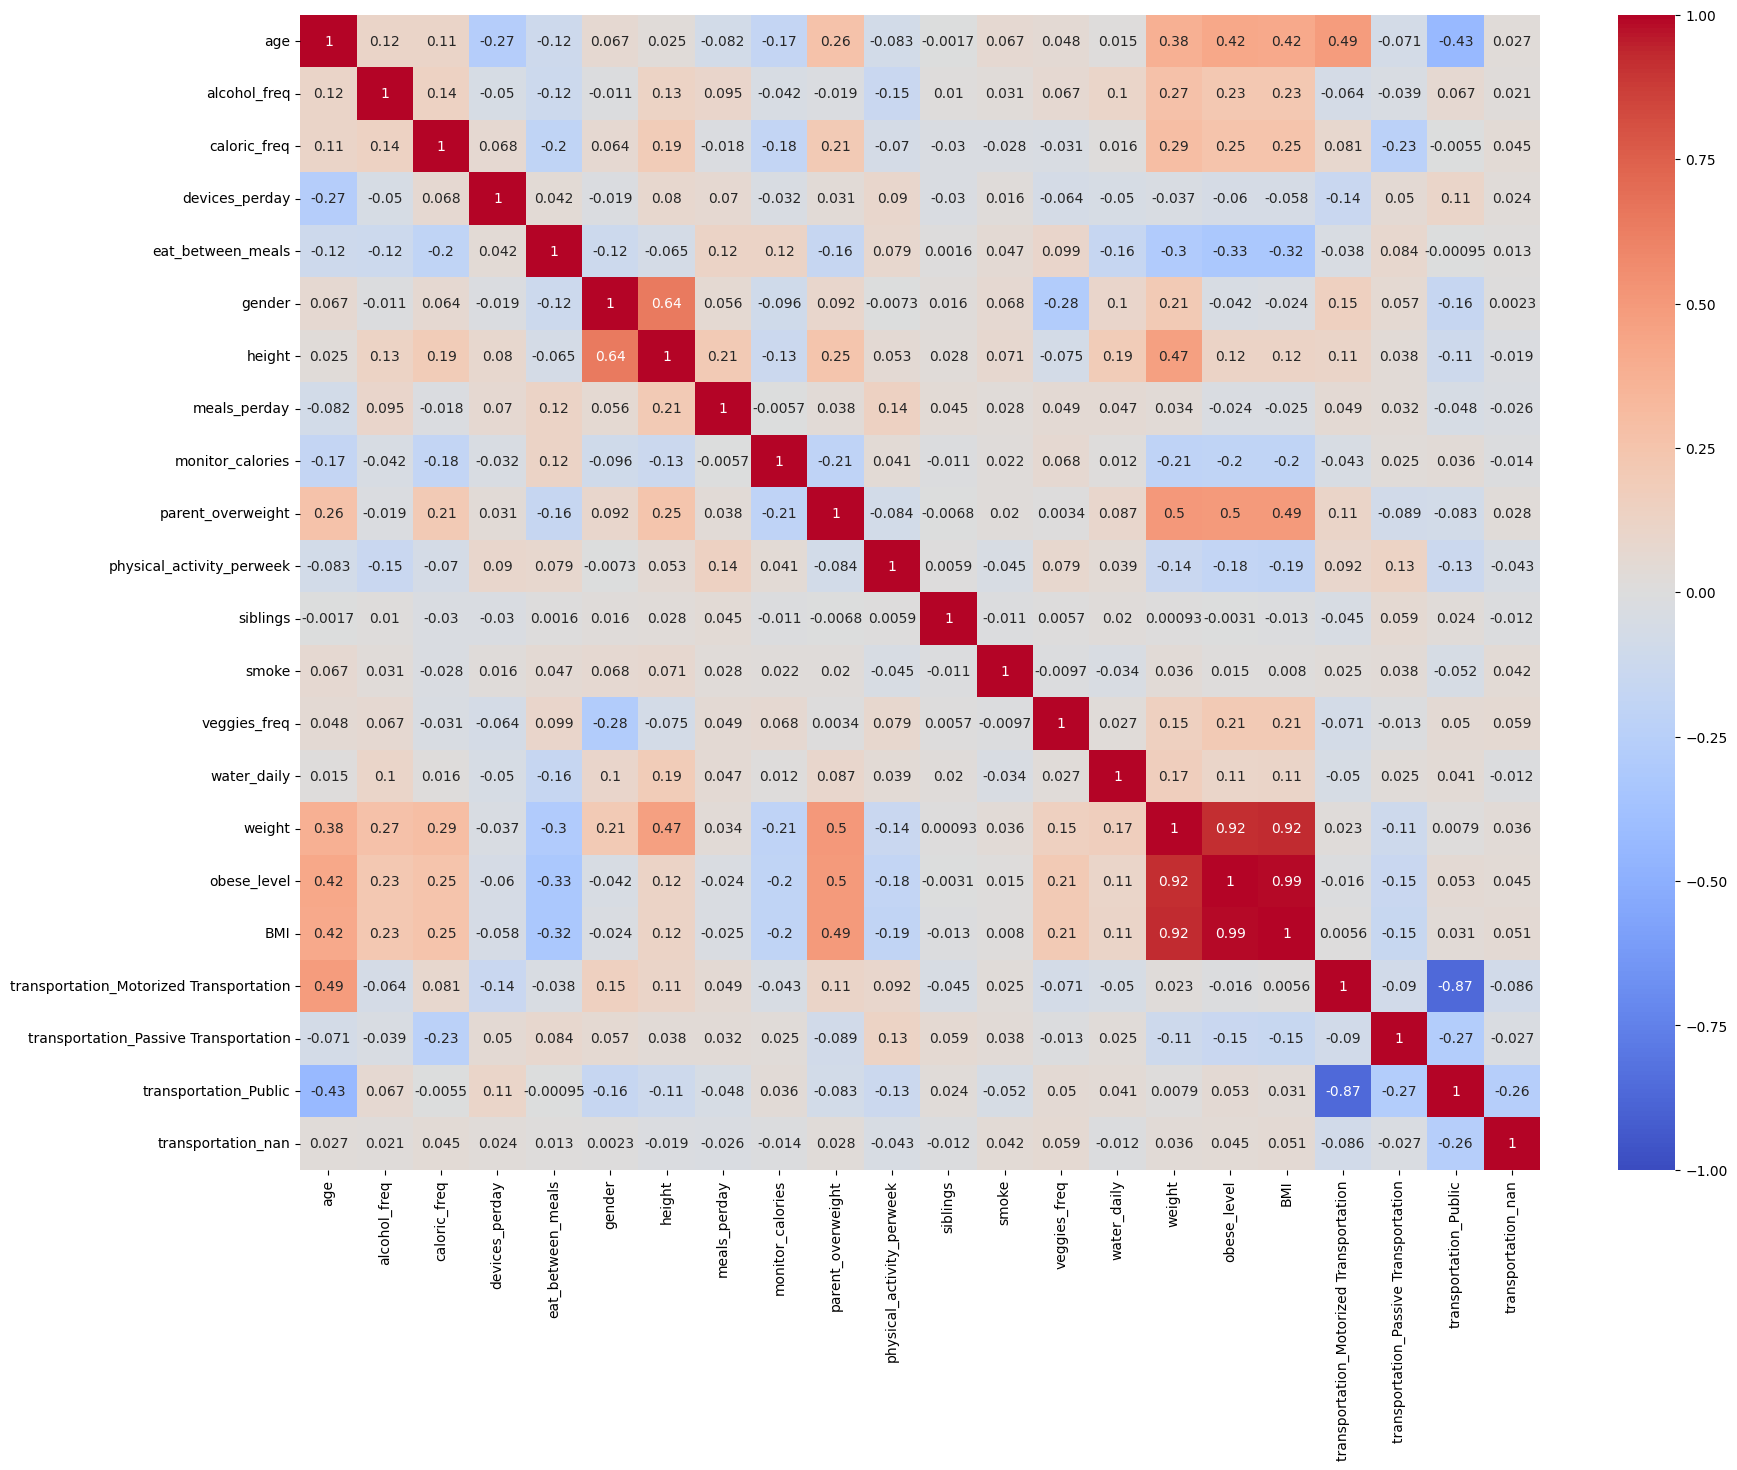

In [204]:
#Checking Correlation with our new "numeric" variables
plt.figure(figsize=(20, 15))
sns.heatmap(
    train.drop(["id"], axis=1).corr(method='spearman', numeric_only=True),
    vmin=-1, vmax=1, annot=True, cmap='coolwarm', annot_kws={"size": 10}
)
plt.show()

BMI, Weight and Public Transportation will be very important!!!!!


### 3.3. Scaling

In [205]:
#Creating a function that Scales train and Validation
def min_max_scale(train_for_scale, val_for_scale):
    min_max_scaler= MinMaxScaler().fit(train_for_scale)
    train_min_max_scaled=min_max_scaler.transform(train_for_scale)
    train_min_max_scaled=pd.DataFrame(train_min_max_scaled, columns=train_for_scale.columns).set_index(train_for_scale.index)
    val_min_max_scaled=min_max_scaler.transform(val_for_scale)
    val_min_max_scaled=pd.DataFrame(val_min_max_scaled, columns=val_for_scale.columns).set_index(val_for_scale.index)
    return train_min_max_scaled,val_min_max_scaled

### 3.4. Missing Values

In [206]:
#Creating a function that imputes values for the numerical categories
def impute_vals_for_numeric(data, num_columns):
    for col in num_columns:
        # Get indices of rows with NaN values in the column
        nan_ixs = data.index[data[col].isna()]  # Corrected

        # Skip columns without NaN values
        if nan_ixs.empty:
            continue

        # Add an indicator column for NaN values
        data["is_nan"] = 0
        data.loc[nan_ixs, "is_nan"] = 1
            
        # Split the data into non-NaN and NaN sets
        non_nan = data[data["is_nan"] == 0]
        nan_ = data[data["is_nan"] == 1]

        # Define features and target for training
        X_train = non_nan.drop(columns=[col, "is_nan"])
        y_train = non_nan[col]

        # Define features for testing
        X_test = nan_.drop(columns=[col, "is_nan"])

        # Skip if no training data is available
        if X_train.empty or y_train.empty:
            continue

        # Train the model, we will use a regressor
        regressor = HistGradientBoostingRegressor()
        regressor=regressor.fit(X_train, y_train)

        # Predict missing values if X_test is non-empty
        if not X_test.empty:
            data.loc[nan_ixs, col] = regressor.predict(X_test)

        # Drop the is_nan column
        data.drop(columns=["is_nan"], inplace=True)
    return data

### 3.5. Feature Selection

In [207]:
#Dipping our toes in Best Parameter for decision Trees and Random forest
def test_model_with_cv(model_name, model, X_train, X_val, y_train, y_val, fold_number, best_params_tracker):

    if model_name == "Decision Tree":
        param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5]}
        grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_
        best_params_tracker[model_name].append(grid_search.best_params_)
        print(f"Best Parameters for {model_name} in Fold {fold_number}: {grid_search.best_params_}")

    elif model_name == "Random Forest":
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
        }
        grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_
        best_params_tracker[model_name].append(grid_search.best_params_)
        print(f"Best Parameters for {model_name} in Fold {fold_number}: {grid_search.best_params_}")


    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"\nFold {fold_number} - {model_name} Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_val, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
    
    return accuracy

In [208]:
#Final Feature Selection Function
def global_feature_selection(X_train, y_train, fold_number, method, threshold, selected_features_tracker, categorical_indices):
    print(f"\nFold {fold_number} - Feature Selection using {method}")
    selected_features = []

    if method in ["mutual_info"]:
        X_train_categorical = X_train.loc[:, X_train.columns.intersection(categorical_indices)]
        if method == "mutual_info":
            selector = SelectKBest(score_func=mutual_info_classif, k='all')
            selector.fit(X_train_categorical, y_train)
            scores = selector.scores_
            selected_features = [col for i, col in enumerate(X_train_categorical.columns) if scores[i] >= threshold]

    if method == "variance_threshold":
        selector = VarianceThreshold(threshold=threshold)
        selector.fit(X_train,y_train)
        selected_indices = selector.get_support(indices=True)
        selected_features = X_train.columns[selected_indices].tolist()
    
    # Spearman Correlation
    elif method == "spearman":
        scores = np.array([abs(spearmanr(X_train.iloc[:, i], y_train).correlation) 
                           for i in range(X_train.shape[1])])
        selected_features = X_train.columns[scores >= threshold].tolist()

    # Kendall Tau Correlation
    elif method == "kendall":
        scores = np.array([abs(kendalltau(X_train.iloc[:, i], y_train).correlation) 
                           for i in range(X_train.shape[1])])
        selected_features = X_train.columns[scores >= threshold].tolist()

    # LASSO
    elif method == "lasso":
        lasso = Lasso(alpha=threshold)
        lasso.fit(X_train, y_train)
        selected_features = X_train.columns[np.abs(lasso.coef_) > 0].tolist()

    elif method == "rfe":
        model = RandomForestClassifier()  
        selector = RFE(estimator=model, n_features_to_select=int(threshold * X_train.shape[1]))
        selector.fit(X_train, y_train)
        selected_features = X_train.columns[selector.support_].tolist()

    # Logistic Regression Coefficients
    elif method == "lr":
        model = LogisticRegression(penalty='l1', solver='liblinear')
        model.fit(X_train, y_train)
        selected_features = X_train.columns[np.abs(model.coef_[0]) > threshold].tolist()

    # Feature Importances - Random Forest
    elif method == "tree_importance":
        model = RandomForestClassifier()
        model.fit(X_train, y_train)
        importances = model.feature_importances_
        selected_features = X_train.columns[importances >= threshold].tolist()

    # SelectKBest with Classification
    elif method == "f_classif":
        selector = SelectKBest(k='all')
        selector.fit(X_train, y_train)
        scores = selector.scores_
        selected_features = X_train.columns[scores >= threshold].tolist()

    print(f"Selected Features in Fold {fold_number}: {selected_features}")
    selected_features_tracker[method].extend(selected_features)
    return selected_features

In [209]:
#Separating data from target
data_to_train= train.drop(columns="obese_level").set_index("id")
data_to_train.head()

,age,alcohol_freq,caloric_freq,devices_perday,eat_between_meals,gender,height,meals_perday,monitor_calories,parent_overweight,physical_activity_perweek,siblings,smoke,veggies_freq,water_daily,weight,BMI,transportation_Motorized Transportation,transportation_Passive Transportation,transportation_Public,transportation_nan
id,,,,,,,,,,,,,,,,,,,,,
1,21.0,0.0,0.0,3.5,1.0,0.0,1.62,3.0,0.0,1.0,NaN,3.0,0.0,1.0,1.0,64.0,24.386526,0.0,0.0,1.0,0.0
2,23.0,NaN,0.0,3.5,1.0,1.0,1.80,3.0,0.0,1.0,3.5,0.0,0.0,1.0,1.0,77.0,23.765432,0.0,0.0,1.0,0.0
4,22.0,2.0,0.0,1.0,1.0,1.0,1.78,1.0,0.0,0.0,NaN,3.0,0.0,1.0,1.0,90.0,28.405504,0.0,0.0,1.0,0.0
5,22.0,2.0,0.0,1.0,1.0,1.0,1.64,3.0,0.0,0.0,5.0,3.0,0.0,1.0,1.0,53.0,19.705532,0.0,0.0,1.0,0.0
6,24.0,NaN,1.0,3.5,1.0,1.0,1.78,3.0,0.0,1.0,1.5,2.0,0.0,3.0,1.0,64.0,20.199470,0.0,0.0,1.0,0.0


In [210]:
#Target
target=train["obese_level"]
target

0       1.0
1       1.0
3       3.0
4       1.0
5       1.0
       ... 
1606    6.0
1607    6.0
1608    6.0
1609    6.0
1610    6.0
Name: obese_level, Length: 1477, dtype: float64

In [211]:
#Categorical indices
categorical_indices = [
    "alcohol_freq", "caloric_freq", "devices_perday", "eat_between_meals",
    "gender", "meals_perday", "monitor_calories", "parent_overweight",
    "physical_activity_perweek", "siblings", "smoke", "veggies_freq",
    "water_daily", "transportation"
]

In [254]:
#Models for Feature Selection
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Naive Bayes", GaussianNB()),
    ("Random Forest", RandomForestClassifier(random_state=42))
]
kf = KFold(n_splits=5, shuffle=True, random_state=42)
summaries = {name: 0 for name, _ in models}
best_params_tracker = defaultdict(list)

selected_features_tracker = defaultdict(list)

#categorical_indices = [data_to_train.columns.get_loc(col) for col in categorical_vars]

# Feature selection methods and thresholds
methods = {
    "variance_threshold": 0.1,
    "mutual_info": 0.05,
    "spearman": 0.3,
    "kendall": 0.2,
    "lasso": 0.01,
    "rfe": 0.5,  
    "tree_importance": 0.02,
    "f_classif": 5.0,
}
# K-Fold loop
for fold, (train_index, val_index) in enumerate(kf.split(data_to_train)):
    print(f"\nFold {fold + 1}")
    print("-----------------")
    
    # Create training and validation sets for this fold
    X_train, X_val = data_to_train.iloc[train_index, :], data_to_train.iloc[val_index, :]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]

    # Check data dimensions for debugging
    print(f"X_train size: {X_train.shape}")
    print(f"X_val size: {X_val.shape}")
    print(f"y_train size: {y_train.shape}")
    print(f"y_val size: {y_val.shape}")
    
    #Scaling and imputing
    X_train_scaled, X_val_scaled=min_max_scale(X_train, X_val)
    X_train_scaled_imputed=impute_vals_for_numeric(X_train_scaled, X_train_scaled.columns)
    X_val_scaled_imputed= impute_vals_for_numeric(X_val_scaled, X_val_scaled.columns)
 

    print(f"Fold {fold}: X_train sample:\n{X_train.head()}")
    print(f"X_train variances:\n{X_train.var()}")

    
    for method, threshold in methods.items():
        global_feature_selection(X_train_scaled, y_train, fold + 1, method, threshold, selected_features_tracker, categorical_indices)


     #Test each model
    print(y_train, y_val)
    for model_name, model in models:
        summaries[model_name] += test_model_with_cv(model_name, model, X_train_scaled_imputed, X_val_scaled_imputed, y_train, y_val, fold + 1, best_params_tracker)

# Global feature selection results
print("\nGlobal Feature Selection Results:")
for method in methods.keys():
    feature_counter = Counter(selected_features_tracker[method])
    most_common_features = [feature for feature, count in feature_counter.items() if count >= 3]
    print(f"{method}: Most Selected Features (Global): {most_common_features}")
    #summy= model_selection_func2(X_train,X_val,y_train,y_val, fold + 1)+summy
# Compute and print the average accuracy for each model

print("\nSummary of Results:")
for model_name, total_accuracy in summaries.items():
    print(f"{model_name}: Mean Accuracy = {total_accuracy / 5:.4f}")

#for model_name in ["Decision Tree", "Random Forest"]:
for model_name in ["Decision Tree", "Random Forest", "Naive Bayes", "Logistic Regression"]:
    if best_params_tracker[model_name]:
        params_counter = Counter(tuple(sorted(p.items())) for p in best_params_tracker[model_name])
        most_common_params = dict(params_counter.most_common(1)[0][0])
        print(f"\nFinal Best Parameters for {model_name}: {most_common_params}")


Fold 1
-----------------
X_train size: (1181, 21)
X_val size: (296, 21)
y_train size: (1181,)
y_val size: (296,)
Fold 0: X_train sample:
     age  alcohol_freq  caloric_freq  devices_perday  eat_between_meals  \
id                                                                        
1   21.0           0.0           0.0             3.5                1.0   
2   23.0           NaN           0.0             3.5                1.0   
4   22.0           2.0           0.0             1.0                1.0   
5   22.0           2.0           0.0             1.0                1.0   
6   24.0           NaN           1.0             3.5                1.0   

    gender  height  meals_perday  monitor_calories  parent_overweight  \
id                                                                      
1      0.0    1.62           3.0               0.0                1.0   
2      1.0    1.80           3.0               0.0                1.0   
4      1.0    1.78           1.0            

Nice Results

In [255]:
#Dictionary with features andi its count
features_dict={meth:None for meth in methods}
for meth in selected_features_tracker:
    temp={}
    for feat in selected_features_tracker[meth]:
        if feat not in temp.keys():
            temp[feat]=1
        else:
            temp[feat]+=1
    features_dict[meth]=temp
#Final DataFrame with Features count
df_feat=pd.DataFrame(features_dict)
df_feat.fillna(0, inplace=True)
df_feat["TOTAL"]=df_feat.sum(axis=1)
df_feat

,variance_threshold,mutual_info,spearman,kendall,lasso,rfe,tree_importance,f_classif,TOTAL
alcohol_freq,1.0,5.0,0.0,2.0,0.0,5.0,5.0,5.0,23.0
caloric_freq,4.0,5.0,0.0,5.0,1.0,0.0,0.0,5.0,20.0
devices_perday,5.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,12.0
gender,5.0,5.0,0.0,0.0,3.0,5.0,5.0,5.0,28.0
parent_overweight,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,38.0
siblings,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0
veggies_freq,5.0,5.0,0.0,0.0,3.0,5.0,5.0,5.0,28.0
water_daily,5.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,10.0
transportation_Motorized Transportation,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,10.0
transportation_Public,5.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,15.0


In [214]:
df_feat[df_feat.TOTAL>25]

,variance_threshold,mutual_info,spearman,kendall,lasso,rfe,tree_importance,f_classif,pca,TOTAL
gender,5.0,5.0,0.0,0.0,3.0,5.0,5.0,5.0,0.0,28.0
parent_overweight,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,0.0,39.0
veggies_freq,5.0,5.0,0.0,0.0,3.0,5.0,5.0,5.0,0.0,28.0
eat_between_meals,0.0,5.0,5.0,5.0,0.0,5.0,5.0,5.0,0.0,30.0
age,0.0,0.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,30.0
BMI,0.0,0.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,30.0


Best 6 Features

In [215]:
#Lists with best 4 and best 6 features
fine_feat6=df_feat[df_feat.TOTAL>25].index
fine_feat4=df_feat[df_feat.TOTAL>29].index
fine_feat4,fine_feat6

(Index(['parent_overweight', 'eat_between_meals', 'age', 'BMI'], dtype='object'),
 Index(['gender', 'parent_overweight', 'veggies_freq', 'eat_between_meals',
        'age', 'BMI'],
       dtype='object'))

<a class="anchor" id="">

# 4 & 5. Model & Assess (Modelling and Assessment)

</a>

<img src="image/step4.png" style="height:60px">

### 4.1. Model Selection

In this section you should take the time to train different predictive algorithms with the data that got to this stage and **use the approppriate model assessment metrics to decide which model you think is the best to address your problem**.

**You are expected to present on your report the model performances of the different algorithms that you tested and discuss what informed your choice for a specific algorithm**

In [216]:
data_to_train.head()

,age,alcohol_freq,caloric_freq,devices_perday,eat_between_meals,gender,height,meals_perday,monitor_calories,parent_overweight,physical_activity_perweek,siblings,smoke,veggies_freq,water_daily,weight,BMI,transportation_Motorized Transportation,transportation_Passive Transportation,transportation_Public,transportation_nan
id,,,,,,,,,,,,,,,,,,,,,
1,21.0,0.0,0.0,3.5,1.0,0.0,1.62,3.0,0.0,1.0,NaN,3.0,0.0,1.0,1.0,64.0,24.386526,0.0,0.0,1.0,0.0
2,23.0,NaN,0.0,3.5,1.0,1.0,1.80,3.0,0.0,1.0,3.5,0.0,0.0,1.0,1.0,77.0,23.765432,0.0,0.0,1.0,0.0
4,22.0,2.0,0.0,1.0,1.0,1.0,1.78,1.0,0.0,0.0,NaN,3.0,0.0,1.0,1.0,90.0,28.405504,0.0,0.0,1.0,0.0
5,22.0,2.0,0.0,1.0,1.0,1.0,1.64,3.0,0.0,0.0,5.0,3.0,0.0,1.0,1.0,53.0,19.705532,0.0,0.0,1.0,0.0
6,24.0,NaN,1.0,3.5,1.0,1.0,1.78,3.0,0.0,1.0,1.5,2.0,0.0,3.0,1.0,64.0,20.199470,0.0,0.0,1.0,0.0


In [217]:
target

0       1.0
1       1.0
3       3.0
4       1.0
5       1.0
       ... 
1606    6.0
1607    6.0
1608    6.0
1609    6.0
1610    6.0
Name: obese_level, Length: 1477, dtype: float64

In [218]:
def kfold_selection(data_for_kfold, models_to_select):
    scores_selection={model_name:{"train":0, "val":0} for model_name in models_to_select.keys()}
    for name, modelo in models_to_select.items():
        kf_temp = KFold(n_splits=5, shuffle=True, random_state=42)
        for (train_index, val_index) in (kf.split(data_for_kfold)):
            #Getting Fold's train and val
            X_train, X_val = data_for_kfold.iloc[train_index, :], data_for_kfold.iloc[val_index, :]
            y_train, y_val = target.iloc[train_index], target.iloc[val_index]
            #Treating
            X_train_scaled, X_val_scaled=min_max_scale(X_train, X_val)
            X_train_scaled_imputed=impute_vals_for_numeric(X_train_scaled, X_train_scaled.columns)
            X_val_scaled_imputed= impute_vals_for_numeric(X_val_scaled, X_val_scaled.columns)
            temp_mod=modelo.fit(X_train_scaled_imputed, y_train)
            temp_T_score, temp_V_score= modelo.score(X_train_scaled_imputed,y_train), modelo.score(X_val_scaled_imputed, y_val)
            scores_selection[name]["train"]+=temp_T_score/5
            scores_selection[name]["val"]+=temp_V_score/5
    return scores_selection

In [219]:
estimators_stacking=[("lr",LogisticRegression()),
                     ("knn", KNeighborsClassifier()),
                      ("naive_bayes",GaussianNB())]

In [220]:
models_for_selection={"Logistic Regression": LogisticRegression(),
        "DecisionTreeClassifier":DecisionTreeClassifier(),
        "Naive Bayes":GaussianNB(),
        "MLP":MLPClassifier(),
        "KNeighbors":KNeighborsClassifier(),
        "GradientBoost":GradientBoostingClassifier(),
        "RandomForestClassifier":RandomForestClassifier(),
        "Stacking":StackingClassifier(estimators=estimators_stacking, final_estimator=LogisticRegression()),
        "AdaBoost":AdaBoostClassifier(),
        "Bagging":BaggingClassifier()

}

In [221]:
score_4_feat=kfold_selection(data_to_train[fine_feat4],models_for_selection)

c:\Users\Duarte\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Duarte\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Duarte\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Duarte\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

In [222]:
score_4_feat

{'Logistic Regression': {'train': 0.7161460862987145,
  'val': 0.7095350435180944},
 'DecisionTreeClassifier': {'train': 1.0, 'val': 0.9478744846541457},
 'Naive Bayes': {'train': 0.626779192831794, 'val': 0.6154397617956939},
 'MLP': {'train': 0.8654375325049322, 'val': 0.8537494273934952},
 'KNeighbors': {'train': 0.9356798491627876, 'val': 0.8984448007329364},
 'GradientBoost': {'train': 1.0, 'val': 0.9546335318369217},
 'RandomForestClassifier': {'train': 1.0, 'val': 0.953279890059551},
 'Stacking': {'train': 0.9453283875691111, 'val': 0.9241571232249199},
 'AdaBoost': {'train': 0.4390653766417229, 'val': 0.4198053137883646},
 'Bagging': {'train': 0.9949221385988816, 'val': 0.9566674301420064}}

In [223]:
score_6_feat=kfold_selection(data_to_train[fine_feat6], models_for_selection)

c:\Users\Duarte\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Duarte\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Duarte\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Duarte\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

In [224]:
score_6_feat

{'Logistic Regression': {'train': 0.7124244417031653,
  'val': 0.7021094823637196},
 'DecisionTreeClassifier': {'train': 1.0, 'val': 0.9553183692166742},
 'Naive Bayes': {'train': 0.8246451500133959, 'val': 0.8131195602382044},
 'MLP': {'train': 0.8634043534760041, 'val': 0.8530943655519927},
 'KNeighbors': {'train': 0.9143538914940592, 'val': 0.8734127347686671},
 'GradientBoost': {'train': 1.0, 'val': 0.9641136051305543},
 'RandomForestClassifier': {'train': 1.0, 'val': 0.9614040311497938},
 'Stacking': {'train': 0.9515911119516427, 'val': 0.9316032982134678},
 'AdaBoost': {'train': 0.4390653766417229, 'val': 0.4198053137883646},
 'Bagging': {'train': 0.9949225684161663, 'val': 0.9573453962437013}}

In [225]:
score_all_feat=kfold_selection(data_to_train, models_for_selection)

c:\Users\Duarte\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Duarte\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

In [226]:
score_all_feat

{'Logistic Regression': {'train': 0.7838540569737138,
  'val': 0.7528607420980302},
 'DecisionTreeClassifier': {'train': 1.0, 'val': 0.9688479157123224},
 'Naive Bayes': {'train': 0.8322715413677645, 'val': 0.8083508932661474},
 'MLP': {'train': 0.9285706712743079, 'val': 0.8740609253321118},
 'KNeighbors': {'train': 0.8077177991635756, 'val': 0.6966903344021989},
 'GradientBoost': {'train': 1.0, 'val': 0.9762963811268897},
 'RandomForestClassifier': {'train': 1.0, 'val': 0.9810398534127347},
 'Stacking': {'train': 0.9172316614873685, 'val': 0.8801534585432891},
 'AdaBoost': {'train': 0.4390653766417229, 'val': 0.4198053137883646},
 'Bagging': {'train': 0.9972915780168516, 'val': 0.9749450297755384}}

In [227]:
df_all_ft=pd.DataFrame(score_all_feat).T.rename({"train":"train_all_feat", "val":"val_all_feat"},axis=1)
df_all_ft["Difference"]=df_all_ft.train_all_feat-df_all_ft.val_all_feat
df_4_feat=pd.DataFrame(score_4_feat).T.rename({"train":"train_4_feat", "val":"val_4_feat"},axis=1)
df_4_feat["Difference"]=df_4_feat.train_4_feat-df_4_feat.val_4_feat
df_6_feat=pd.DataFrame(score_6_feat).T.rename({"train":"train_6_feat", "val":"val_6_feat"},axis=1)
df_6_feat["Difference"]=df_6_feat.train_6_feat-df_6_feat.val_6_feat
df_features=pd.concat([df_all_ft, df_4_feat, df_6_feat], axis=1)
df_features

,train_all_feat,val_all_feat,Difference,train_4_feat,val_4_feat,Difference,train_6_feat,val_6_feat,Difference
Logistic Regression,0.783854,0.752861,0.030993,0.716146,0.709535,0.006611,0.712424,0.702109,0.010315
DecisionTreeClassifier,1.000000,0.968848,0.031152,1.000000,0.947874,0.052126,1.000000,0.955318,0.044682
Naive Bayes,0.832272,0.808351,0.023921,0.626779,0.615440,0.011339,0.824645,0.813120,0.011526
MLP,0.928571,0.874061,0.054510,0.865438,0.853749,0.011688,0.863404,0.853094,0.010310
KNeighbors,0.807718,0.696690,0.111027,0.935680,0.898445,0.037235,0.914354,0.873413,0.040941
GradientBoost,1.000000,0.976296,0.023704,1.000000,0.954634,0.045366,1.000000,0.964114,0.035886
RandomForestClassifier,1.000000,0.981040,0.018960,1.000000,0.953280,0.046720,1.000000,0.961404,0.038596
Stacking,0.917232,0.880153,0.037078,0.945328,0.924157,0.021171,0.951591,0.931603,0.019988
AdaBoost,0.439065,0.419805,0.019260,0.439065,0.419805,0.019260,0.439065,0.419805,0.019260
Bagging,0.997292,0.974945,0.022347,0.994922,0.956667,0.038255,0.994923,0.957345,0.037577


In [228]:
#Overfitting Models - Decision Tree, Gradient Boost, Random Forest
#Worse Models - AdaBoost, Logistic Regression, Naive Bayes
#Most Promissing Models - MLP, Stacking 6 Features, Bagging, KNeighbors with 6 Features

### 4.2. Model Optimization

After selecting the best algorithm (set of algorithms), you can try to optimize the performance of your model by fiddling with the algorithms' hyper-parameters and select the options that result on the best overall performance.

Possible ways of doing this can be through:
1. [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
2. [RandomSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

**While you are not required to show the results of all combinations of hyperparameters that you tried, you should at least discuss the what were the possible combinations used and which of them resulted in your best performance**

In [229]:
data_to_train.head()

,age,alcohol_freq,caloric_freq,devices_perday,eat_between_meals,gender,height,meals_perday,monitor_calories,parent_overweight,physical_activity_perweek,siblings,smoke,veggies_freq,water_daily,weight,BMI,transportation_Motorized Transportation,transportation_Passive Transportation,transportation_Public,transportation_nan
id,,,,,,,,,,,,,,,,,,,,,
1,21.0,0.0,0.0,3.5,1.0,0.0,1.62,3.0,0.0,1.0,NaN,3.0,0.0,1.0,1.0,64.0,24.386526,0.0,0.0,1.0,0.0
2,23.0,NaN,0.0,3.5,1.0,1.0,1.80,3.0,0.0,1.0,3.5,0.0,0.0,1.0,1.0,77.0,23.765432,0.0,0.0,1.0,0.0
4,22.0,2.0,0.0,1.0,1.0,1.0,1.78,1.0,0.0,0.0,NaN,3.0,0.0,1.0,1.0,90.0,28.405504,0.0,0.0,1.0,0.0
5,22.0,2.0,0.0,1.0,1.0,1.0,1.64,3.0,0.0,0.0,5.0,3.0,0.0,1.0,1.0,53.0,19.705532,0.0,0.0,1.0,0.0
6,24.0,NaN,1.0,3.5,1.0,1.0,1.78,3.0,0.0,1.0,1.5,2.0,0.0,3.0,1.0,64.0,20.199470,0.0,0.0,1.0,0.0


In [230]:
target

0       1.0
1       1.0
3       3.0
4       1.0
5       1.0
       ... 
1606    6.0
1607    6.0
1608    6.0
1609    6.0
1610    6.0
Name: obese_level, Length: 1477, dtype: float64

In [231]:
#Holdout for Model Optimization, use almost all data, val is not needed
X_train_optim, X_val_optim, y_train_optim, y_val_optim=train_test_split(data_to_train, target, train_size=0.99, stratify=target)
X_train_optim, X_val_optim=min_max_scale(X_train_optim, X_val_optim)
X_train_optim=impute_vals_for_numeric(X_train_optim,X_train_optim.columns)
X_val_optim=impute_vals_for_numeric(X_val_optim,X_val_optim.columns)

In [232]:
def grid_search(model_grid,params_grid, X_optim,y_optim):
    temp_model= model_grid
    grid_bagging=GridSearchCV(temp_model, params_grid, cv=3, scoring='accuracy')
    grid_bagging=grid_bagging.fit(X_optim,y_optim)
    return grid_bagging.best_params_

In [233]:
def random_search(model_grid,params_grid, X_optim,y_optim):
    temp_model= model_grid
    grid_bagging=GridSearchCV(temp_model, params_grid, cv=3, scoring='accuracy')
    grid_bagging=grid_bagging.fit(X_optim,y_optim)
    return grid_bagging.best_params_

In [234]:
params_tree = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

tree_best = []

for i in range(5):
    tree_best += [grid_search(DecisionTreeClassifier(), params_tree, X_train_optim, y_train_optim)]

temp = pd.DataFrame(tree_best)

best_cv = []
for col in temp.columns:
    print(col, temp[col].mode().values[0])

criterion entropy
max_depth 5.0
min_samples_leaf 2
min_samples_split 2
splitter best


In [235]:
params_Logistic = {
    "penalty": ["l1", "l2", "elasticnet", None],
    "C": [0.01, 0.1, 1, 10],
    "solver": ["liblinear", "saga"],
    "max_iter": [100, 200, 300]
}
logistic_best = []
for i in range(10):
    logistic_best += [grid_search(LogisticRegression(), params_Logistic, X_train_optim, y_train_optim)]
temp = pd.DataFrame(logistic_best)
best_cv = []
for col in temp.columns:
    mode_result = temp[col].mode()  
    if not mode_result.empty: 
        print(col, mode_result.values[0])
    else:
        print(f"{col} has no mode (all values may be NaN or unique).")

c:\Users\Duarte\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Duarte\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Duarte\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Duarte\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Duarte\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Use

C 0.01
max_iter 300
penalty has no mode (all values may be NaN or unique).
solver saga


c:\Users\Duarte\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [236]:
params_Bagging={"n_estimators":[50,75,100],"max_samples":[0.25,0.5,0.75,1],"bootstrap":[True,False]}
bagging_best=[]
for i in range(10):
    bagging_best+=[grid_search(BaggingClassifier(), params_Bagging, X_train_optim, y_train_optim)]
temp=pd.DataFrame(bagging_best)
best_cv=[]
for col in temp.columns:
    print(col, temp[col].mode().values[0])

bootstrap False
max_samples 0.75
n_estimators 100


In [237]:
params_KNN={"n_neighbors":[2,5,10], "algorithm":["kd_tree", "brute"], "metric":["manhattan", "minkowski","euclidean"]}
knn_best=[]
for i in range(10):
    knn_best+=[grid_search(KNeighborsClassifier(), params_KNN, X_train_optim[fine_feat4], y_train_optim)]
temp=pd.DataFrame(knn_best)
best_cv=[]
for col in temp.columns:
    print(col, temp[col].mode().values[0])

c:\Users\Duarte\anaconda3\envs\MachineLearning\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\Duarte\anaconda3\envs\MachineLearning\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\Duarte\anaconda3\envs\MachineLearning\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\Duarte\anaconda3\envs\MachineLearning\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\Duarte\anaconda3\envs\MachineLearning\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\Duarte\anaconda3\envs\MachineLearning\Lib\site-packages\

algorithm kd_tree
metric manhattan
n_neighbors 5


c:\Users\Duarte\anaconda3\envs\MachineLearning\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [238]:
params_boost={"learning_rate":[0.01,0.1,0.3],"n_estimators":[10,50,100],"subsample":[0.5,1]}
boost_best=[]
for i in range(5):
    boost_best+=[grid_search(GradientBoostingClassifier(), params_boost, X_train_optim, y_train_optim)]
temp=pd.DataFrame(boost_best)
best_cv=[]
for col in temp.columns:
    print(col, temp[col].mode().values[0])

learning_rate 0.01
n_estimators 50
subsample 0.5


In [239]:
params_forest={"n_estimators":[50,100,200,300],"bootstrap":[True, False], "max_depth":[3,5,10, None]}
forest_best=[]
for i in range(5):
    forest_best+=[grid_search(RandomForestClassifier(), params_forest, X_train_optim, y_train_optim)]
temp=pd.DataFrame(forest_best)
best_cv=[]
for col in temp.columns:
    print(col, temp[col].mode().values[0])

bootstrap True
max_depth 10.0
n_estimators 200


In [240]:
params_MLP={"solver":["adam","lbfgs","sgd"],"learning_rate":["constant", "adaptive","invscalling"], "learning_rate_init":[0.01, 0.1, 0.3], "batch_size":[50,100,500]}
mlp_best=[]
for i in range(5):
    mlp_best+=[random_search(MLPClassifier(early_stopping=True), params_MLP, X_train_optim, y_train_optim)]
temp=pd.DataFrame(mlp_best)
best_cv=[]
for col in temp.columns:
    print(col, temp[col].mode().values[0])

c:\Users\Duarte\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Duarte\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Duarte\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
81 fits failed out of a total of 243.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by

batch_size 100
learning_rate adaptive
learning_rate_init 0.01
solver lbfgs


c:\Users\Duarte\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [241]:
#Some parameters vary with different Grid search runs. Did my best but still can be some errors
models_for_final_optimization_all_features={"Bagging_Tuned":BaggingClassifier(bootstrap=True,max_samples=0.75, n_estimators=75),
                               "GradientBoost":GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,subsample=1.0),
                               "RandomForest":RandomForestClassifier(n_estimators=100, bootstrap=False, max_depth=10),
                               "MLP": MLPClassifier(solver="lbfgs", learning_rate="constant", learning_rate_init=0.1, batch_size=50)
                               }
#KNEIGHBOR IS WITH 4 FEATURES
models_for_final_optimization_4_features={"KNeighbors":KNeighborsClassifier(algorithm="kd_tree",metric="manhattan", n_neighbors=5)}

In [242]:
score_final_all_feat=kfold_selection(data_to_train,models_for_final_optimization_all_features)
score_final_all_feat

{'Bagging_Tuned': {'train': 0.9964456976006167, 'val': 0.9708841044434267},
 'GradientBoost': {'train': 1.0, 'val': 0.975620705451214},
 'RandomForest': {'train': 1.0, 'val': 0.9844228126431517},
 'MLP': {'train': 1.0, 'val': 0.9492006413192854}}

In [243]:
score_final_4_feat=kfold_selection(data_to_train[fine_feat4],models_for_final_optimization_4_features)
score_final_4_feat

{'KNeighbors': {'train': 0.9385573326112404, 'val': 0.9025080164910675}}

In [244]:
import itertools
estim_stack=[("lr",LogisticRegression()),
             ("knn",KNeighborsClassifier()),
             ("ada",AdaBoostClassifier()), 
             ("nb",GaussianNB()),
             ("BT",BaggingClassifier(estimator = DecisionTreeClassifier(),bootstrap=True,max_samples=0.75, n_estimators=75)),
             ("GB",GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,subsample=1.0)),
             ("RF",RandomForestClassifier(n_estimators=100, bootstrap=False, max_depth=10)),
             ("DT",DecisionTreeClassifier(criterion= "gini",max_depth=5,min_samples_leaf=1,min_samples_split=2,splitter="best"))]
final_estim=list(itertools.combinations(estim_stack,3))
final_estim=[list(subset) for subset in final_estim]
final_estim


[[('lr', LogisticRegression()),
  ('knn', KNeighborsClassifier()),
  ('ada', AdaBoostClassifier())],
 [('lr', LogisticRegression()),
  ('knn', KNeighborsClassifier()),
  ('nb', GaussianNB())],
 [('lr', LogisticRegression()),
  ('knn', KNeighborsClassifier()),
  ('BT',
   BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.75,
                     n_estimators=75))],
 [('lr', LogisticRegression()),
  ('knn', KNeighborsClassifier()),
  ('GB', GradientBoostingClassifier())],
 [('lr', LogisticRegression()),
  ('knn', KNeighborsClassifier()),
  ('RF', RandomForestClassifier(bootstrap=False, max_depth=10))],
 [('lr', LogisticRegression()),
  ('knn', KNeighborsClassifier()),
  ('DT', DecisionTreeClassifier(max_depth=5))],
 [('lr', LogisticRegression()),
  ('ada', AdaBoostClassifier()),
  ('nb', GaussianNB())],
 [('lr', LogisticRegression()),
  ('ada', AdaBoostClassifier()),
  ('BT',
   BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.75,
                    

In [245]:
stacking_for_optim = {
    "LR,KNN,Ada": StackingClassifier(estimators=final_estim[0], final_estimator=LogisticRegression()),
    "LR,KNN,NB": StackingClassifier(estimators=final_estim[1], final_estimator=LogisticRegression()),
    "LR,Ada,NB": StackingClassifier(estimators=final_estim[2], final_estimator=LogisticRegression()),
    "KNN,Ada,NB": StackingClassifier(estimators=final_estim[3], final_estimator=LogisticRegression(max_iter=300,C= 0.01,solver="saga")),
    "nb,BT,GB":StackingClassifier(estimators=final_estim[31], final_estimator=LogisticRegression()),
    "nb,BT,RF":StackingClassifier(estimators=final_estim[32], final_estimator=LogisticRegression()),
    "GB,RF,DT":StackingClassifier(estimators=final_estim[55], final_estimator=LogisticRegression()),
    "BT,GB,DT":StackingClassifier(estimators=final_estim[53], final_estimator=LogisticRegression()),
    "BT,RF,DT":StackingClassifier(estimators=final_estim[54], final_estimator=MLPClassifier()),
    "BT,GB,RF": StackingClassifier(estimators=final_estim[34], final_estimator=LogisticRegression())}

In [246]:
#Best was with 6 features
score_final_stacking=kfold_selection(data_to_train[fine_feat6], stacking_for_optim)
score_final_stacking

c:\Users\Duarte\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Duarte\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Duarte\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Duarte\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed i

{'LR,KNN,Ada': {'train': 0.9468509436638486, 'val': 0.9140357306458999},
 'LR,KNN,NB': {'train': 0.9515911119516427, 'val': 0.9316032982134678},
 'LR,Ada,NB': {'train': 0.9944143811132553, 'val': 0.9695327530920752},
 'KNN,Ada,NB': {'train': 0.999322894504213, 'val': 0.9688547869903803},
 'nb,BT,GB': {'train': 0.9983073795329606, 'val': 0.9708863948694457},
 'nb,BT,RF': {'train': 0.9900131953906395, 'val': 0.9654695373339441},
 'GB,RF,DT': {'train': 0.9988151370185867, 'val': 0.964111314704535},
 'BT,GB,DT': {'train': 0.993906623627629, 'val': 0.963431058176821},
 'BT,RF,DT': {'train': 0.9961065717630101, 'val': 0.9688570774163996},
 'BT,GB,RF': {'train': 0.9939066236276292, 'val': 0.9634356390288594}}

In [247]:
df_all=pd.DataFrame(score_final_all_feat).T.rename({"train":"train_all_feat", "val":"val_all_feat"},axis=1)
df_all["Difference"]=df_all.train_all_feat-df_all.val_all_feat
df_4=pd.DataFrame(score_final_4_feat).T.rename({"train":"train_4_feat", "val":"val_4_feat"},axis=1)
df_4["Difference"]=df_4.train_4_feat-df_4.val_4_feat
df_stack=pd.DataFrame(score_final_stacking).T.rename({"train":"train_6_feat", "val":"val_6_feat"},axis=1)
df_stack["Difference"]=df_stack.train_6_feat-df_stack.val_6_feat
df_features=pd.concat([df_all, df_4, df_stack], axis=1)
df_features

,train_all_feat,val_all_feat,Difference,train_4_feat,val_4_feat,Difference,train_6_feat,val_6_feat,Difference
Bagging_Tuned,0.996446,0.970884,0.025562,NaN,NaN,NaN,NaN,NaN,NaN
GradientBoost,1.000000,0.975621,0.024379,NaN,NaN,NaN,NaN,NaN,NaN
RandomForest,1.000000,0.984423,0.015577,NaN,NaN,NaN,NaN,NaN,NaN
MLP,1.000000,0.949201,0.050799,NaN,NaN,NaN,NaN,NaN,NaN
KNeighbors,NaN,NaN,NaN,0.938557,0.902508,0.036049,NaN,NaN,NaN
"LR,KNN,Ada",NaN,NaN,NaN,NaN,NaN,NaN,0.946851,0.914036,0.032815
"LR,KNN,NB",NaN,NaN,NaN,NaN,NaN,NaN,0.951591,0.931603,0.019988
"LR,Ada,NB",NaN,NaN,NaN,NaN,NaN,NaN,0.994414,0.969533,0.024882
"KNN,Ada,NB",NaN,NaN,NaN,NaN,NaN,NaN,0.999323,0.968855,0.030468
"nb,BT,GB",NaN,NaN,NaN,NaN,NaN,NaN,0.998307,0.970886,0.027421


In [249]:
final_pls={"Bagging_Tuned":BaggingClassifier(bootstrap=True,max_samples=0.75, n_estimators=50)}

<a class="anchor" id="">

# 5. Deploy

</a>

<img src="image/step5.png" style="height:60px">

### 5.0 Training a final model

You used the previous steps of modelling and assessment to determine what would be best strategies when it comes to preprocessing, scaling, feature selection, algorithm and hyper-parameters you could find.

**By this stage, all of those choices were already made**. For that reason, a split between training and validation is no longer necessary. **A good practice** would be to take the initial data and train a final model with all of the labeled data that you have available.

**Everything is figured by this stage**, so, on a first level all you need to do is replicate the exact preprocessing, scaling and feature selection decisions you made before.<br>
When it comes to the final model, all you have to do is creeate a new instance of your best algorithm with the best parameters that you uncovered (no need to try all algorithms and hyper-parameters again).

In [250]:
data_to_train.head()

,age,alcohol_freq,caloric_freq,devices_perday,eat_between_meals,gender,height,meals_perday,monitor_calories,parent_overweight,physical_activity_perweek,siblings,smoke,veggies_freq,water_daily,weight,BMI,transportation_Motorized Transportation,transportation_Passive Transportation,transportation_Public,transportation_nan
id,,,,,,,,,,,,,,,,,,,,,
1,21.0,0.0,0.0,3.5,1.0,0.0,1.62,3.0,0.0,1.0,NaN,3.0,0.0,1.0,1.0,64.0,24.386526,0.0,0.0,1.0,0.0
2,23.0,NaN,0.0,3.5,1.0,1.0,1.80,3.0,0.0,1.0,3.5,0.0,0.0,1.0,1.0,77.0,23.765432,0.0,0.0,1.0,0.0
4,22.0,2.0,0.0,1.0,1.0,1.0,1.78,1.0,0.0,0.0,NaN,3.0,0.0,1.0,1.0,90.0,28.405504,0.0,0.0,1.0,0.0
5,22.0,2.0,0.0,1.0,1.0,1.0,1.64,3.0,0.0,0.0,5.0,3.0,0.0,1.0,1.0,53.0,19.705532,0.0,0.0,1.0,0.0
6,24.0,NaN,1.0,3.5,1.0,1.0,1.78,3.0,0.0,1.0,1.5,2.0,0.0,3.0,1.0,64.0,20.199470,0.0,0.0,1.0,0.0


In [251]:
final_scaler=MinMaxScaler().fit(data_to_train)
final_data=final_scaler.transform(data_to_train)
final_data=pd.DataFrame(final_data, columns=data_to_train.columns).set_index(data_to_train.index)
final_data=impute_vals_for_numeric(final_data, data_to_train.columns)
final_data.head()

,age,alcohol_freq,caloric_freq,devices_perday,eat_between_meals,gender,height,meals_perday,monitor_calories,parent_overweight,physical_activity_perweek,siblings,smoke,veggies_freq,water_daily,weight,BMI,transportation_Motorized Transportation,transportation_Passive Transportation,transportation_Public,transportation_nan
id,,,,,,,,,,,,,,,,,,,,,
1,0.128205,0.000000,0.0,0.5,0.333333,0.0,0.320755,0.666667,0.0,1.0,0.262946,1.000000,0.0,0.333333,0.5,0.248062,0.298763,0.0,0.0,1.0,0.0
2,0.179487,0.377927,0.0,0.5,0.333333,1.0,0.660377,0.666667,0.0,1.0,0.571429,0.000000,0.0,0.333333,0.5,0.348837,0.282265,0.0,0.0,1.0,0.0
4,0.153846,0.500000,0.0,0.0,0.333333,1.0,0.622642,0.000000,0.0,0.0,0.155625,1.000000,0.0,0.333333,0.5,0.449612,0.405514,0.0,0.0,1.0,0.0
5,0.153846,0.500000,0.0,0.0,0.333333,1.0,0.358491,0.666667,0.0,0.0,1.000000,1.000000,0.0,0.333333,0.5,0.162791,0.174428,0.0,0.0,1.0,0.0
6,0.205128,0.404051,1.0,0.5,0.333333,1.0,0.622642,0.666667,0.0,1.0,0.000000,0.666667,0.0,1.000000,0.5,0.248062,0.187547,0.0,0.0,1.0,0.0


### 5.1. Import and Transform your test data

Remember, the test data does not have the `outcome` variable.

In [ ]:
test_ = pd.read_csv('data/obesity_test.csv')
test_data=test_.copy()

In [91]:
test_data.head()

,id,age,alcohol_freq,caloric_freq,devices_perday,eat_between_meals,gender,height,marrital_status,meals_perday,monitor_calories,parent_overweight,physical_activity_perweek,region,siblings,smoke,transportation,veggies_freq,water_daily,weight
0,1612,21.0,Sometimes,no,up to 2,Sometimes,Female,1.52,NaN,3.0,yes,yes,5 or more,LatAm,3.0,yes,Public,Always,more than 2,56.0
1,1613,29.0,Sometimes,yes,up to 2,Sometimes,Male,1.62,NaN,3.0,no,no,NaN,LatAm,3.0,no,Car,Sometimes,1 to 2,53.0
2,1614,23.0,Sometimes,NaN,up to 2,Sometimes,Female,1.50,NaN,3.0,no,yes,1 to 2,LatAm,2.0,no,Motorbike,Always,1 to 2,NaN
3,1615,22.0,Never,yes,up to 5,Sometimes,Male,1.72,NaN,3.0,no,yes,1 to 2,LatAm,1.0,no,Public,Sometimes,1 to 2,68.0
4,1616,26.0,Sometimes,yes,more than 5,Frequently,Male,1.85,NaN,3.0,no,yes,3 to 4,LatAm,1.0,no,Public,Always,more than 2,105.0


In [92]:
#Droping
test_data.drop(columns=["marrital_status","region"],inplace=True)

#Derived Variables
test_data["BMI"]=test_data["weight"]/(test_data["height"]**2)

#Label Enconding
test_ordinal_columns=["eat_between_meals","alcohol_freq","veggies_freq","water_daily"]

test_categories={
    "eat_between_meals": ["Never", "Sometimes", "Frequently","Always"], 
    "alcohol_freq": ["Never", "Rarely", "Sometimes", "Often","Always"], 
    "veggies_freq": ["Never", "Sometimes", "Often","Always"],
    "water_daily":["less than 1","1 to 2","more than 2"],
}

oetest=OrdinalEncoder(categories=[
    test_categories["eat_between_meals"],
    test_categories["alcohol_freq"],
    test_categories["veggies_freq"],
    test_categories["water_daily"]],
    handle_unknown="use_encoded_value", unknown_value=np.nan)

# Apply the OrdinalEncoder to the columns in the train DataFrame

test_data[test_ordinal_columns] = oetest.fit_transform(test_data[test_ordinal_columns])

binary_columns = ["parent_overweight", "smoke", "monitor_calories", "caloric_freq"]

for col in binary_columns:
    test_nan_mask=test_data[col].isna()
    test_data[col] = test_data[col].map({'yes': 1, 'no': 0})
    test_data[col] = test_data[col].where(~test_nan_mask, np.nan)

test_number_map = {"0": 0,"1 to 2": 1.5,"3 to 4": 3.5,"5 or more": 5}
test_data['physical_activity_perweek'] = test_data['physical_activity_perweek'].map(test_number_map)

test_devices_map = {"up to 2":1,"up to 5":3.5,"more than 5":6}
test_data["devices_perday"] = test_data["devices_perday"].map(test_devices_map)

le = LabelEncoder()

test_data["gender"] = test_data["gender"].fillna("Unknown")

test_data["gender"] = le.fit_transform(test_data["gender"])
test_data["gender"].replace(le.transform(["Unknown"])[0], np.nan, inplace=True)

test_data['transportation'] = test_data['transportation'].replace(['Bicycle', 'Walk'], 'Passive Transportation')
test_data['transportation'] = test_data['transportation'].replace(['Motorbike','Car'], 'Motorized Transportation')
# One-hot encode
col = test_data[["transportation"]]
encoder = OneHotEncoder()
one_hot_encoded = encoder.fit_transform(col)

# Create DataFrame from one-hot encoded array
one_hot_df = pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.get_feature_names_out(["transportation"]))
one_hot_df.index = test_data.index  # Ensure indices match

# Merge back with original DataFrame
test_data = pd.concat([test_data.drop(columns=["transportation"]), one_hot_df], axis=1)

C:\Users\jpalo\AppData\Local\Temp\ipykernel_14584\1487574476.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data["gender"].replace(le.transform(["Unknown"])[0], np.nan, inplace=True)


In [93]:
test_data.head()

,id,age,alcohol_freq,caloric_freq,devices_perday,eat_between_meals,gender,height,meals_perday,monitor_calories,parent_overweight,physical_activity_perweek,siblings,smoke,veggies_freq,water_daily,weight,BMI,transportation_Motorized Transportation,transportation_Passive Transportation,transportation_Public,transportation_nan
0,1612,21.0,2.0,0.0,1.0,1.0,0.0,1.52,3.0,1.0,1.0,5.0,3.0,1.0,3.0,2.0,56.0,24.238227,0.0,0.0,1.0,0.0
1,1613,29.0,2.0,1.0,1.0,1.0,1.0,1.62,3.0,0.0,0.0,NaN,3.0,0.0,1.0,1.0,53.0,20.195092,1.0,0.0,0.0,0.0
2,1614,23.0,2.0,NaN,1.0,1.0,0.0,1.50,3.0,0.0,1.0,1.5,2.0,0.0,3.0,1.0,NaN,NaN,1.0,0.0,0.0,0.0
3,1615,22.0,0.0,1.0,3.5,1.0,1.0,1.72,3.0,0.0,1.0,1.5,1.0,0.0,1.0,1.0,68.0,22.985398,0.0,0.0,1.0,0.0
4,1616,26.0,2.0,1.0,6.0,2.0,1.0,1.85,3.0,0.0,1.0,3.5,1.0,0.0,3.0,2.0,105.0,30.679328,0.0,0.0,1.0,0.0


In [94]:
test_mm=test_data.set_index("id")
test_mm_scaled=final_scaler.transform(test_mm)
test_mm_scaled=pd.DataFrame(test_mm_scaled, columns=test_mm.columns).set_index(test_mm.index)
test_mm_scaled.head()

,age,alcohol_freq,caloric_freq,devices_perday,eat_between_meals,gender,height,meals_perday,monitor_calories,parent_overweight,physical_activity_perweek,siblings,smoke,veggies_freq,water_daily,weight,BMI,transportation_Motorized Transportation,transportation_Passive Transportation,transportation_Public,transportation_nan
id,,,,,,,,,,,,,,,,,,,,,
1612,0.128205,0.5,0.0,0.0,0.333333,0.0,0.132075,0.666667,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.0,0.186047,0.294824,0.0,0.0,1.0,0.0
1613,0.333333,0.5,1.0,0.0,0.333333,1.0,0.320755,0.666667,0.0,0.0,NaN,1.000000,0.0,0.333333,0.5,0.162791,0.187431,1.0,0.0,0.0,0.0
1614,0.179487,0.5,NaN,0.0,0.333333,0.0,0.094340,0.666667,0.0,1.0,0.000000,0.666667,0.0,1.000000,0.5,NaN,NaN,1.0,0.0,0.0,0.0
1615,0.153846,0.0,1.0,0.5,0.333333,1.0,0.509434,0.666667,0.0,1.0,0.000000,0.333333,0.0,0.333333,0.5,0.279070,0.261546,0.0,0.0,1.0,0.0
1616,0.256410,0.5,1.0,1.0,0.666667,1.0,0.754717,0.666667,0.0,1.0,0.571429,0.333333,0.0,1.000000,1.0,0.565891,0.465910,0.0,0.0,1.0,0.0


In [95]:
test_scaled_imputed=impute_vals_for_numeric(test_mm_scaled, test_mm_scaled.columns)
test_scaled_imputed.head()

,age,alcohol_freq,caloric_freq,devices_perday,eat_between_meals,gender,height,meals_perday,monitor_calories,parent_overweight,physical_activity_perweek,siblings,smoke,veggies_freq,water_daily,weight,BMI,transportation_Motorized Transportation,transportation_Passive Transportation,transportation_Public,transportation_nan
id,,,,,,,,,,,,,,,,,,,,,
1612,0.128205,0.5,0.000000,0.0,0.333333,0.0,0.132075,0.666667,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.0,0.186047,0.294824,0.0,0.0,1.0,0.0
1613,0.333333,0.5,1.000000,0.0,0.333333,1.0,0.320755,0.666667,0.0,0.0,0.187782,1.000000,0.0,0.333333,0.5,0.162791,0.187431,1.0,0.0,0.0,0.0
1614,0.179487,0.5,0.361242,0.0,0.333333,0.0,0.094340,0.666667,0.0,1.0,0.000000,0.666667,0.0,1.000000,0.5,0.287936,0.434823,1.0,0.0,0.0,0.0
1615,0.153846,0.0,1.000000,0.5,0.333333,1.0,0.509434,0.666667,0.0,1.0,0.000000,0.333333,0.0,0.333333,0.5,0.279070,0.261546,0.0,0.0,1.0,0.0
1616,0.256410,0.5,1.000000,1.0,0.666667,1.0,0.754717,0.666667,0.0,1.0,0.571429,0.333333,0.0,1.000000,1.0,0.565891,0.465910,0.0,0.0,1.0,0.0


### 5.2. Obtain Predictions on the test data from your final model

In [96]:
predictions_test={}

In [97]:
for name, modelo in final_pls.items():
    temp_mod=modelo.fit(final_data, target)
    temp_pred= modelo.predict(test_scaled_imputed)
    predictions_test[name]=[temp_pred]

In [98]:
predictions_test.keys()

dict_keys(['Bagging_Tuned'])

In [99]:
mapxx={0.0:'Insufficient_Weight',
       1.0: 'Normal_Weight', 
       2.0:'Overweight_Level_I', 
       3.0:'Overweight_Level_II', 
       4.0: 'Obesity_Type_I', 
       5.0:'Obesity_Type_II', 
       6.0 :'Obesity_Type_III'}

In [100]:
#temp_xx=pd.DataFrame(predictions_test["MLP"]).T.set_index(test_scaled_imputed.index)
#temp_xx=temp_xx.rename({0:"pred"}, axis=1)
#temp_xx["pred"]=temp_xx["pred"].map(mapxx)
#temp_xx

In [101]:
df_dict={}


for key in predictions_test.keys():
       temp_xx=pd.DataFrame(predictions_test[key]).T.set_index(test_scaled_imputed.index)
       temp_xx=temp_xx.rename({0:"pred"}, axis=1)
       temp_xx["pred"]=temp_xx["pred"].map(mapxx)
       df_dict[key]=temp_xx



In [102]:
df_dict.keys()

dict_keys(['Bagging_Tuned'])

### 5.3. Create a Dataframe containing the index of each row and its intended prediction and export it to a csv file

In [ ]:
for key, final_df in df_dict.items():
    final_df.to_csv(f"C:/temp/{key}_pred.csv")

Submit the csv file to Kaggle to obtain the model performance of your model on the test data.